In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pystan 
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pickle
from tqdm.notebook import tqdm as tqdm
import math
from scipy.stats import gaussian_kde

In [2]:
data = pd.read_csv('Cam_all_55ºC_2023_02_22.csv')
data = data[(data["Strain_Name"]!="RIMD 0366027")&(data["Strain_Name"]!="RIMD 0366043")]
data["ID_strain_II"] = (data["ID_strain"] != data["ID_strain"].shift(1)).cumsum()
data["ID_strain_origin"] = data["ID_strain"]
data["ID_strain"] = data["ID_strain_II"]
data = data.drop("ID_strain_II", axis=1)

pd.set_option('display.max_rows', None)
data

Strain_Name  ID_strain  rep_ID  t_heat  n_dilu         V  non_detect  \
0      ATCC 33250          1       1    0.00       3  0.000540           0   
1      ATCC 33250          1       1    0.00       3  0.000540           0   
2      ATCC 33250          1       2    0.00       3  0.000540           0   
3      ATCC 33250          1       2    0.00       3  0.000540           0   
4      ATCC 33250          1       3    0.00       3  0.000540           0   
5      ATCC 33250          1       3    0.00       3  0.000540           0   
6      ATCC 33250          1       1    2.25       2  0.000540           0   
7      ATCC 33250          1       1    2.25       2  0.000540           0   
8      ATCC 33250          1       2    2.25       2  0.000540           0   
9      ATCC 33250          1       2    2.25       2  0.000540           0   
10     ATCC 33250          1       3    2.25       2  0.000540           0   
11     ATCC 33250          1       3    2.25       2  0.000540           0   
12     ATCC 33250          1       1    4.50       1  0.000540           0   
13     ATCC 33250          1       1    4.50       1  0.000540           0   
14     ATCC 33250          1       2    4.50       1  0.000540           0   
15     ATCC 33250          1       2    4.50       1  0.000540           0   
16     ATCC 33250          1       3    4.50       1  0.000540           0   
17     ATCC 33250          1       3    4.50       1  0.000540           0   
18     ATCC 33250          1       1    6.75       0  0.000540           0   
19     ATCC 33250          1       1    6.75       0  0.000540           0   
20     ATCC 33250          1       2    6.75       0  0.000540           0   
21     ATCC 33250          1       2    6.75       0  0.000540           0   
22     ATCC 33250          1       3    6.75       0  0.000540           0   
23     ATCC 33250          1       3    6.75       0  0.000540           0   
24     ATCC 33250          1       1    9.00       0  0.000540           0   
25     ATCC 33250          1       1    9.00       0  0.000540           0   
26     ATCC 33250          1       2    9.00       0  0.000540           0   
27     ATCC 33250          1       2    9.00       0  0.000540           0   
28     ATCC 33250          1       3    9.00       0  0.000540           0   
29     ATCC 33250          1       3    9.00       0  0.000540           0   
30     ATCC 33250          1       1   11.25       0  0.000540           0   
31     ATCC 33250          1       1   11.25       0  0.000540           0   
32     ATCC 33250          1       2   11.25       0  0.000540           0   
33     ATCC 33250          1       2   11.25       0  0.000540           0   
34     ATCC 33250          1       3   11.25       0  0.000540           0   
35     ATCC 33250          1       3   11.25       0  0.000540           0   
36     ATCC 33291          2       1    0.00       4  0.002640           0   
37     ATCC 33291          2       1    0.00       4  0.002640           0   
38     ATCC 33291          2       2    0.00       4  0.002640           0   
39     ATCC 33291          2       2    0.00       4  0.002640           0   
40     ATCC 33291          2       3    0.00       4  0.002640           0   
41     ATCC 33291          2       3    0.00       4  0.002640           0   
42     ATCC 33291          2       1    2.25       3  0.002640           0   
43     ATCC 33291          2       1    2.25       3  0.002640           0   
44     ATCC 33291          2       2    2.25       3  0.002640           0   
45     ATCC 33291          2       2    2.25       3  0.002640           0   
46     ATCC 33291          2       3    2.25       3  0.002640           0   
47     ATCC 33291          2       3    2.25       3  0.002640           0   
48     ATCC 33291          2       1    4.50       2  0.012500           0   
49     ATCC 33291          2       1    4.50       2  0.012500           0   
50     ATCC 33291          2

In [3]:
StrainCount = 29
StrainCount_MPC = 29
StrainCount_fit = StrainCount - StrainCount_MPC

In [4]:
datum = data[data["ID_strain"]<=StrainCount]
datum

Strain_Name  ID_strain  rep_ID  t_heat  n_dilu         V  non_detect  \
0      ATCC 33250          1       1    0.00       3  0.000540           0   
1      ATCC 33250          1       1    0.00       3  0.000540           0   
2      ATCC 33250          1       2    0.00       3  0.000540           0   
3      ATCC 33250          1       2    0.00       3  0.000540           0   
4      ATCC 33250          1       3    0.00       3  0.000540           0   
5      ATCC 33250          1       3    0.00       3  0.000540           0   
6      ATCC 33250          1       1    2.25       2  0.000540           0   
7      ATCC 33250          1       1    2.25       2  0.000540           0   
8      ATCC 33250          1       2    2.25       2  0.000540           0   
9      ATCC 33250          1       2    2.25       2  0.000540           0   
10     ATCC 33250          1       3    2.25       2  0.000540           0   
11     ATCC 33250          1       3    2.25       2  0.000540           0   
12     ATCC 33250          1       1    4.50       1  0.000540           0   
13     ATCC 33250          1       1    4.50       1  0.000540           0   
14     ATCC 33250          1       2    4.50       1  0.000540           0   
15     ATCC 33250          1       2    4.50       1  0.000540           0   
16     ATCC 33250          1       3    4.50       1  0.000540           0   
17     ATCC 33250          1       3    4.50       1  0.000540           0   
18     ATCC 33250          1       1    6.75       0  0.000540           0   
19     ATCC 33250          1       1    6.75       0  0.000540           0   
20     ATCC 33250          1       2    6.75       0  0.000540           0   
21     ATCC 33250          1       2    6.75       0  0.000540           0   
22     ATCC 33250          1       3    6.75       0  0.000540           0   
23     ATCC 33250          1       3    6.75       0  0.000540           0   
24     ATCC 33250          1       1    9.00       0  0.000540           0   
25     ATCC 33250          1       1    9.00       0  0.000540           0   
26     ATCC 33250          1       2    9.00       0  0.000540           0   
27     ATCC 33250          1       2    9.00       0  0.000540           0   
28     ATCC 33250          1       3    9.00       0  0.000540           0   
29     ATCC 33250          1       3    9.00       0  0.000540           0   
30     ATCC 33250          1       1   11.25       0  0.000540           0   
31     ATCC 33250          1       1   11.25       0  0.000540           0   
32     ATCC 33250          1       2   11.25       0  0.000540           0   
33     ATCC 33250          1       2   11.25       0  0.000540           0   
34     ATCC 33250          1       3   11.25       0  0.000540           0   
35     ATCC 33250          1       3   11.25       0  0.000540           0   
36     ATCC 33291          2       1    0.00       4  0.002640           0   
37     ATCC 33291          2       1    0.00       4  0.002640           0   
38     ATCC 33291          2       2    0.00       4  0.002640           0   
39     ATCC 33291          2       2    0.00       4  0.002640           0   
40     ATCC 33291          2       3    0.00       4  0.002640           0   
41     ATCC 33291          2       3    0.00       4  0.002640           0   
42     ATCC 33291          2       1    2.25       3  0.002640           0   
43     ATCC 33291          2       1    2.25       3  0.002640           0   
44     ATCC 33291          2       2    2.25       3  0.002640           0   
45     ATCC 33291          2       2    2.25       3  0.002640           0   
46     ATCC 33291          2       3    2.25       3  0.002640           0   
47     ATCC 33291          2       3    2.25       3  0.002640           0   
48     ATCC 33291          2       1    4.50       2  0.012500           0   
49     ATCC 33291          2       1    4.50       2  0.012500           0   
50     ATCC 33291          2

In [5]:
list(data["Strain_Name"].unique())

['ATCC 33250',
 'ATCC 33291',
 'ATCC 33560',
 'NADC 5096',
 'BB520',
 'LA525',
 'lA525',
 'ULB527',
 'UBB527',
 'RIMD 0366026',
 'RIMD 0366028',
 'RIMD 0366029',
 'RIMD 0366042',
 'RIMD 0366044',
 'RIMD 0366048',
 'RIMD 0366049',
 'RIMD 0366050',
 'RIMD 0366051',
 'IFTK 60',
 'IFTK 87',
 'IFTK 146',
 'IFTK 189',
 'IFTK 207',
 'IFTK 241',
 'IFTK 252',
 'IFTK 312',
 'IFTK 323',
 'IFTK 345',
 'IFTK 363']

In [6]:
StrainNum_MPC = list(range(1,StrainCount+1))
print(StrainNum_MPC)

for i in range(StrainCount_MPC):
    if i == 0:
        datum_MPC =  data[data["ID_strain"]==StrainNum_MPC[i]]
    if i != 0:
        datum_MPC = pd.concat([datum_MPC, data[data["ID_strain"]==StrainNum_MPC[i]]], axis=0, ignore_index=True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [7]:
datum_MPC["ID_strain_MPC"] = (datum_MPC["ID_strain"] != datum_MPC["ID_strain"].shift(1)).cumsum()
datum_MPC

Strain_Name  ID_strain  rep_ID  t_heat  n_dilu         V  non_detect  \
0      ATCC 33250          1       1    0.00       3  0.000540           0   
1      ATCC 33250          1       1    0.00       3  0.000540           0   
2      ATCC 33250          1       2    0.00       3  0.000540           0   
3      ATCC 33250          1       2    0.00       3  0.000540           0   
4      ATCC 33250          1       3    0.00       3  0.000540           0   
5      ATCC 33250          1       3    0.00       3  0.000540           0   
6      ATCC 33250          1       1    2.25       2  0.000540           0   
7      ATCC 33250          1       1    2.25       2  0.000540           0   
8      ATCC 33250          1       2    2.25       2  0.000540           0   
9      ATCC 33250          1       2    2.25       2  0.000540           0   
10     ATCC 33250          1       3    2.25       2  0.000540           0   
11     ATCC 33250          1       3    2.25       2  0.000540           0   
12     ATCC 33250          1       1    4.50       1  0.000540           0   
13     ATCC 33250          1       1    4.50       1  0.000540           0   
14     ATCC 33250          1       2    4.50       1  0.000540           0   
15     ATCC 33250          1       2    4.50       1  0.000540           0   
16     ATCC 33250          1       3    4.50       1  0.000540           0   
17     ATCC 33250          1       3    4.50       1  0.000540           0   
18     ATCC 33250          1       1    6.75       0  0.000540           0   
19     ATCC 33250          1       1    6.75       0  0.000540           0   
20     ATCC 33250          1       2    6.75       0  0.000540           0   
21     ATCC 33250          1       2    6.75       0  0.000540           0   
22     ATCC 33250          1       3    6.75       0  0.000540           0   
23     ATCC 33250          1       3    6.75       0  0.000540           0   
24     ATCC 33250          1       1    9.00       0  0.000540           0   
25     ATCC 33250          1       1    9.00       0  0.000540           0   
26     ATCC 33250          1       2    9.00       0  0.000540           0   
27     ATCC 33250          1       2    9.00       0  0.000540           0   
28     ATCC 33250          1       3    9.00       0  0.000540           0   
29     ATCC 33250          1       3    9.00       0  0.000540           0   
30     ATCC 33250          1       1   11.25       0  0.000540           0   
31     ATCC 33250          1       1   11.25       0  0.000540           0   
32     ATCC 33250          1       2   11.25       0  0.000540           0   
33     ATCC 33250          1       2   11.25       0  0.000540           0   
34     ATCC 33250          1       3   11.25       0  0.000540           0   
35     ATCC 33250          1       3   11.25       0  0.000540           0   
36     ATCC 33291          2       1    0.00       4  0.002640           0   
37     ATCC 33291          2       1    0.00       4  0.002640           0   
38     ATCC 33291          2       2    0.00       4  0.002640           0   
39     ATCC 33291          2       2    0.00       4  0.002640           0   
40     ATCC 33291          2       3    0.00       4  0.002640           0   
41     ATCC 33291          2       3    0.00       4  0.002640           0   
42     ATCC 33291          2       1    2.25       3  0.002640           0   
43     ATCC 33291          2       1    2.25       3  0.002640           0   
44     ATCC 33291          2       2    2.25       3  0.002640           0   
45     ATCC 33291          2       2    2.25       3  0.002640           0   
46     ATCC 33291          2       3    2.25       3  0.002640           0   
47     ATCC 33291          2       3    2.25       3  0.002640           0   
48     ATCC 33291          2       1    4.50       2  0.012500           0   
49     ATCC 33291          2       1    4.50       2  0.012500           0   
50     ATCC 33291          2

In [8]:
sm_MPC = pickle.load(open('Single strain for Strain MPC stan.pkl', 'rb'))

fit_nuts_MPC = sm_MPC.sampling(
    data = dict(N = len(datum_MPC['Nt_count']),
              L = int(StrainCount_MPC),
              K = 3,
              ID_strain = datum_MPC['ID_strain_MPC'],
              ID_rep = datum_MPC['rep_ID'],
              t_heat = datum_MPC['t_heat'],
              n_dilu = datum_MPC['n_dilu'],
              V = datum_MPC['V'],
              Nt_plate_count = datum_MPC['Nt_count']), 
    iter = 125000, chains = 4, thin = 1, warmup = 100000, seed = 12345, 
    control = dict(adapt_delta = 0.8, max_treedepth = 15))

Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.

Gradient evaluation took 0.000285 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.85 seconds.
Adjust your expectations accordingly!


Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.

Gradient evaluation took 0.000249 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.49 seconds.
Adjust your expectations accordingly!


Iteration:      1 / 125000 [  0%]  (Warmup)
Iteration:      1 / 125000 [  0%]  (Warmup)

Gradient evaluation took 0.00029 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.9 seconds.
Adjust your expectations accordingly!


Iteration:      1 / 125000 [  0%]  (Warmup)
Rejecting initial value:
  Gradient evaluated at the initial value is not finite.
  Stan can't s

In [9]:
print(fit_nuts_MPC)
samples_MPC = fit_nuts_MPC.extract(permuted=True)

with open('Samples extracted only MPC stan.pkl', 'wb') as g:
    pickle.dump(samples_MPC, g)

Inference for Stan model: anon_model_5386d57d7275f848be685f6cbb469720.
4 chains, each with iter=125000; warmup=100000; thin=1; 
post-warmup draws per chain=25000, total post-warmup draws=100000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
LogC0[1,1]            8.9  3.6e-5 8.8e-3   8.88    8.9    8.9   8.91   8.92  58894    1.0
LogC0[2,1]           8.35  7.7e-5   0.03    8.3   8.34   8.35   8.37    8.4 104989    1.0
LogC0[3,1]           8.95  1.0e-4   0.03   8.89   8.93   8.95   8.97    9.0  77473    1.0
LogC0[4,1]           8.81  1.5e-4   0.03   8.74   8.79   8.81   8.83   8.87  48123    1.0
LogC0[5,1]           8.66  6.7e-5   0.02   8.61   8.64   8.66   8.67    8.7 119542    1.0
LogC0[6,1]            8.8  1.2e-4   0.04   8.72   8.77    8.8   8.83   8.88 111511    1.0
LogC0[7,1]           9.03  1.1e-4   0.03   8.97   9.01   9.03   9.05   9.09  71460    1.0
LogC0[8,1]           8.44  1.5e-4   0.04   8.35   8.41   8.44   8.47   8.52  88418  

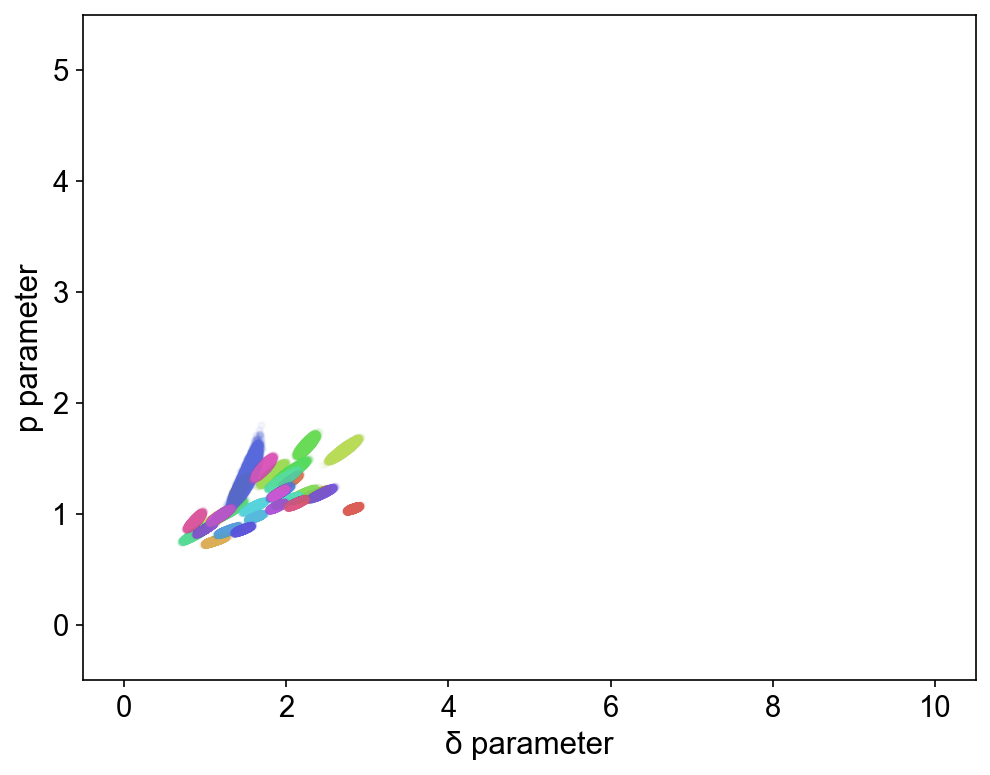

In [10]:
Colmax = StrainCount + 1
Palette = sns.color_palette("hls", n_colors = Colmax)
plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("δ parameter",size=15,fontname="Arial")
plt.ylabel("p parameter",size=15,fontname="Arial")
#plt.ylim([0.995,1.255])
#plt.xlim([2.15,3.05])
plt.ylim([-0.5,5.5])
plt.xlim([-0.5,10.5])

for i in range(StrainCount):
    if i+1 in StrainNum_MPC:
        StNum = int(np.mean(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==(i+1)]))-1
        plt.plot(samples_MPC['delta'][:,StNum],samples_MPC['power'][:,StNum], color=Palette[i], lw=0, marker='.', alpha=0.05)
plt.show()

In [11]:
wholedelta = samples_MPC['delta'][:,0]
wholepower = samples_MPC['power'][:,0]
for i in range(StrainCount_MPC):
    wholedelta = np.concatenate([wholedelta, samples_MPC['delta'][:,i]])
    wholepower = np.concatenate([wholepower, samples_MPC['power'][:,i]])

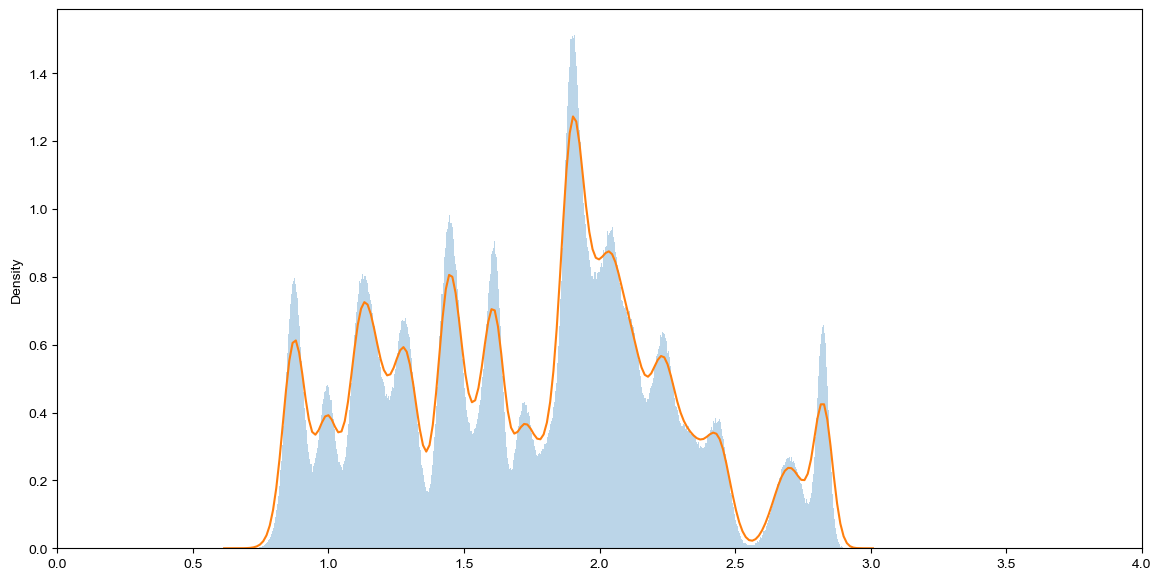

In [12]:
plt.figure(figsize=(14,7))
plt.hist(wholedelta, alpha=0.3, bins=600, density=True)
sns.kdeplot(wholedelta)
plt.xlim(0,4)
plt.show()

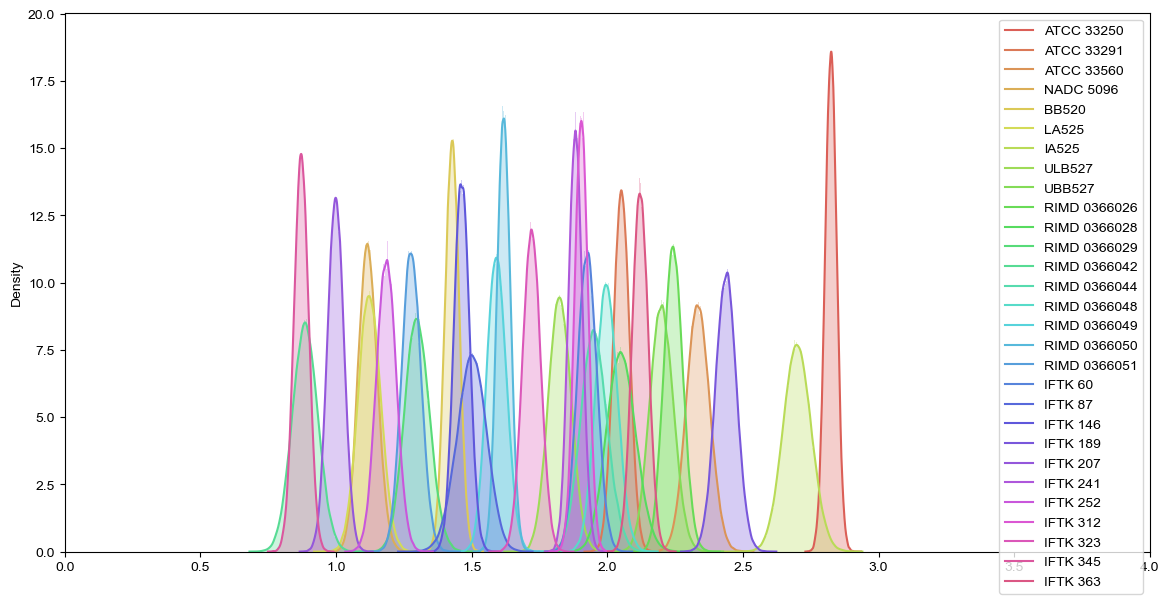

In [13]:
StrainName = list(data["Strain_Name"].unique())
plt.figure(figsize=(14,7))
for i in range(StrainCount):
    if i+1 in StrainNum_MPC:
        StNum = int(np.mean(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==(i+1)]))-1
        plt.hist(samples_MPC['delta'][:,StNum], alpha=0.3, bins=150, density=True, color=Palette[i])
        sns.kdeplot(samples_MPC['delta'][:,StNum], color=Palette[i], label=StrainName[i])
plt.xlim(0,4)
plt.legend()
plt.show()

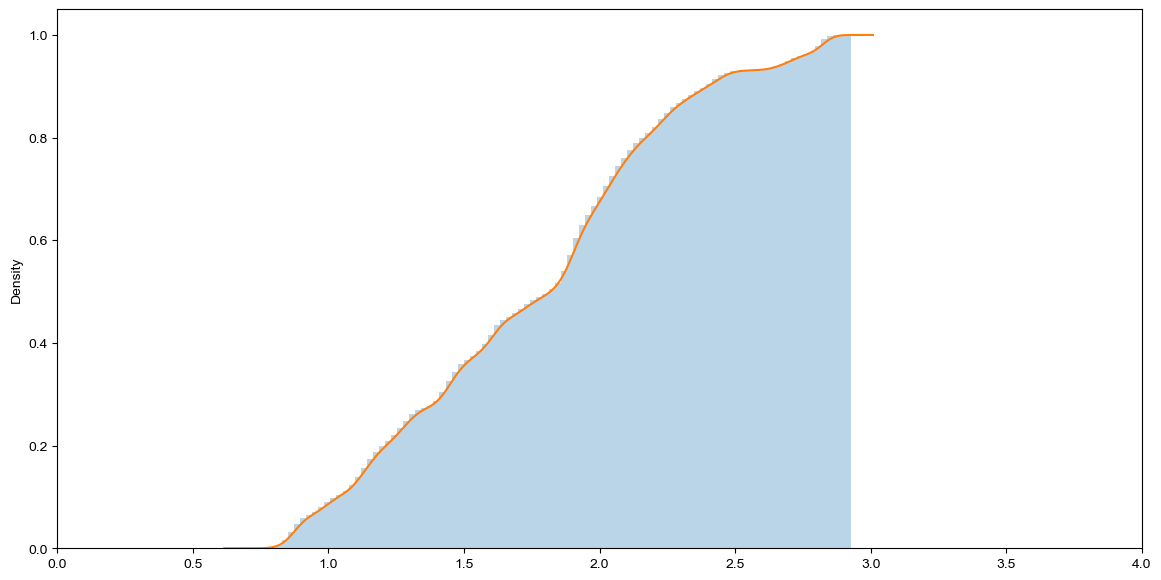

In [14]:
plt.figure(figsize=(14,7))
plt.hist(wholedelta, alpha=0.3, bins=100, density=True, cumulative=True)
sns.kdeplot(wholedelta, cumulative=True)
plt.xlim(0,4)
plt.show()

In [16]:
print(np.quantile(wholedelta,[0.025,0.975]))

[0.86503646 2.81252098]


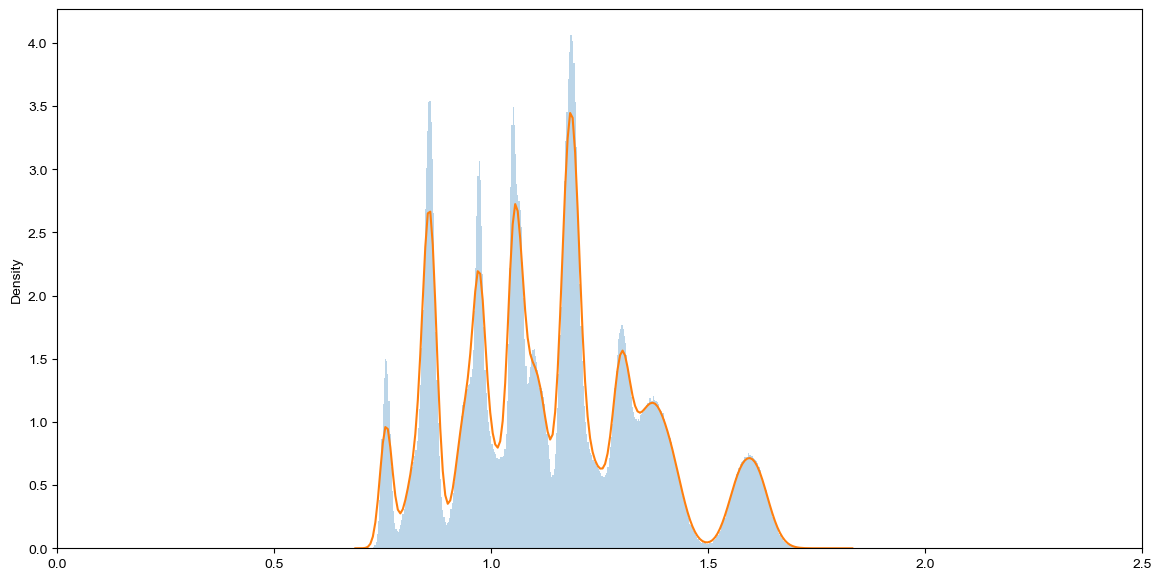

In [18]:
plt.figure(figsize=(14,7))
plt.hist(wholepower, alpha=0.3, bins=400, density=True)
sns.kdeplot(wholepower)
plt.xlim(0,2.5)
plt.show()

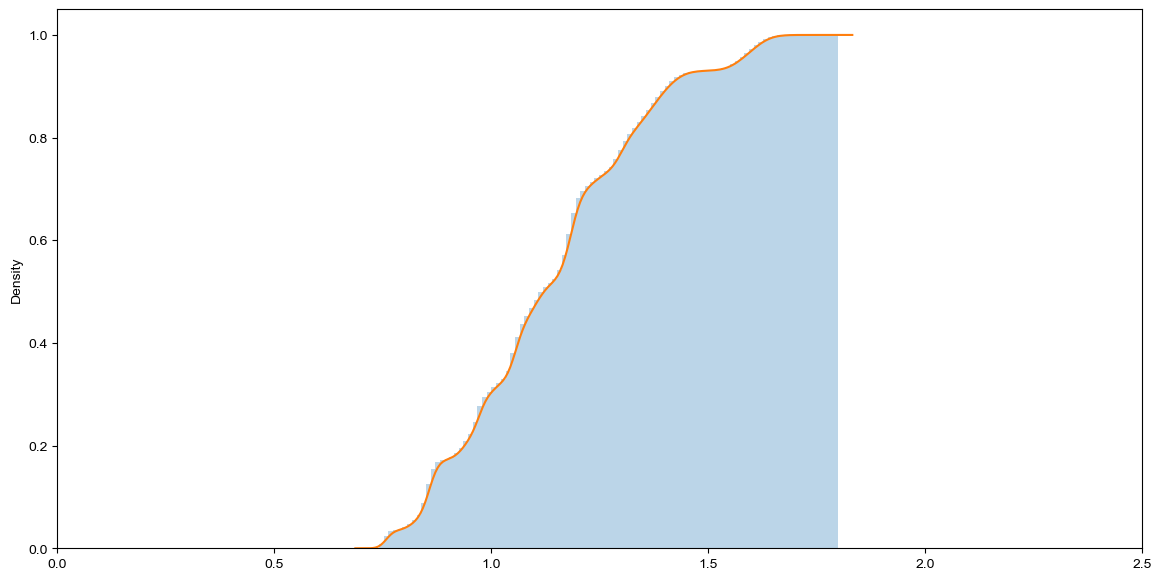

In [19]:
plt.figure(figsize=(14,7))
plt.hist(wholepower, alpha=0.3, bins=100, density=True, cumulative=True)
sns.kdeplot(wholepower, cumulative=True)
plt.xlim(0,2.5)
plt.show()

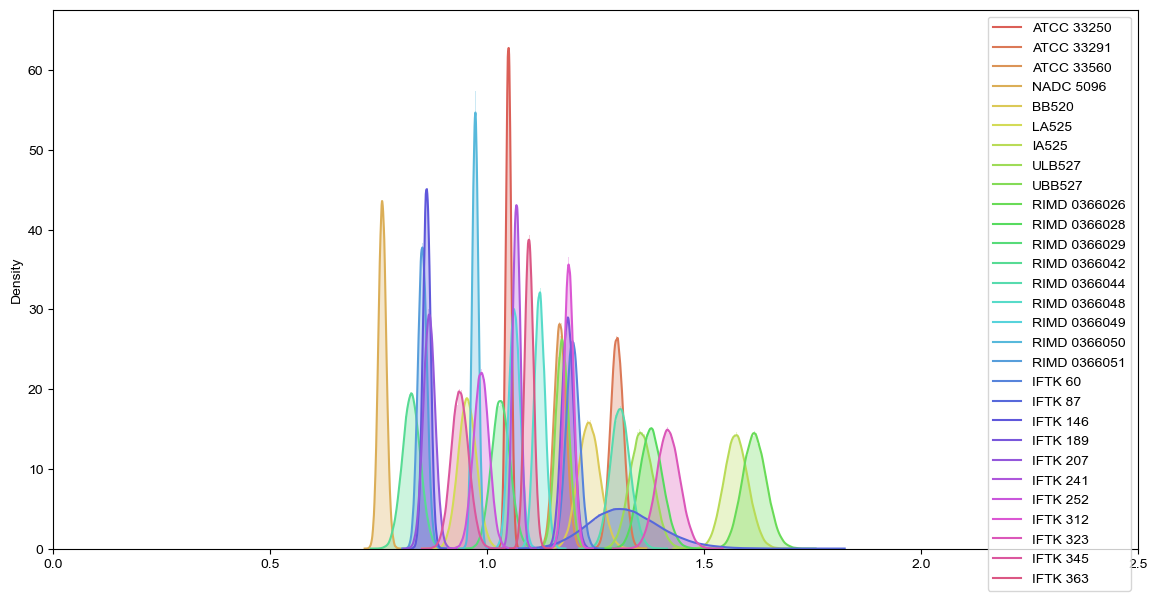

In [20]:
plt.figure(figsize=(14,7))
for i in range(StrainCount):
    if i+1 in StrainNum_MPC:
        StNum = int(np.mean(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==(i+1)]))-1
        plt.hist(samples_MPC['power'][:,StNum], alpha=0.3, bins=150, density=True, color=Palette[i])
        sns.kdeplot(samples_MPC['power'][:,StNum], color=Palette[i], label=StrainName[i])
plt.xlim(0,2.5)
plt.legend()
plt.show()

In [23]:
print(np.quantile(wholepower,[0.025,0.975]))

[0.7638585  1.60801983]


In [24]:
data

Strain_Name  ID_strain  rep_ID  t_heat  n_dilu         V  non_detect  \
0      ATCC 33250          1       1    0.00       3  0.000540           0   
1      ATCC 33250          1       1    0.00       3  0.000540           0   
2      ATCC 33250          1       2    0.00       3  0.000540           0   
3      ATCC 33250          1       2    0.00       3  0.000540           0   
4      ATCC 33250          1       3    0.00       3  0.000540           0   
5      ATCC 33250          1       3    0.00       3  0.000540           0   
6      ATCC 33250          1       1    2.25       2  0.000540           0   
7      ATCC 33250          1       1    2.25       2  0.000540           0   
8      ATCC 33250          1       2    2.25       2  0.000540           0   
9      ATCC 33250          1       2    2.25       2  0.000540           0   
10     ATCC 33250          1       3    2.25       2  0.000540           0   
11     ATCC 33250          1       3    2.25       2  0.000540           0   
12     ATCC 33250          1       1    4.50       1  0.000540           0   
13     ATCC 33250          1       1    4.50       1  0.000540           0   
14     ATCC 33250          1       2    4.50       1  0.000540           0   
15     ATCC 33250          1       2    4.50       1  0.000540           0   
16     ATCC 33250          1       3    4.50       1  0.000540           0   
17     ATCC 33250          1       3    4.50       1  0.000540           0   
18     ATCC 33250          1       1    6.75       0  0.000540           0   
19     ATCC 33250          1       1    6.75       0  0.000540           0   
20     ATCC 33250          1       2    6.75       0  0.000540           0   
21     ATCC 33250          1       2    6.75       0  0.000540           0   
22     ATCC 33250          1       3    6.75       0  0.000540           0   
23     ATCC 33250          1       3    6.75       0  0.000540           0   
24     ATCC 33250          1       1    9.00       0  0.000540           0   
25     ATCC 33250          1       1    9.00       0  0.000540           0   
26     ATCC 33250          1       2    9.00       0  0.000540           0   
27     ATCC 33250          1       2    9.00       0  0.000540           0   
28     ATCC 33250          1       3    9.00       0  0.000540           0   
29     ATCC 33250          1       3    9.00       0  0.000540           0   
30     ATCC 33250          1       1   11.25       0  0.000540           0   
31     ATCC 33250          1       1   11.25       0  0.000540           0   
32     ATCC 33250          1       2   11.25       0  0.000540           0   
33     ATCC 33250          1       2   11.25       0  0.000540           0   
34     ATCC 33250          1       3   11.25       0  0.000540           0   
35     ATCC 33250          1       3   11.25       0  0.000540           0   
36     ATCC 33291          2       1    0.00       4  0.002640           0   
37     ATCC 33291          2       1    0.00       4  0.002640           0   
38     ATCC 33291          2       2    0.00       4  0.002640           0   
39     ATCC 33291          2       2    0.00       4  0.002640           0   
40     ATCC 33291          2       3    0.00       4  0.002640           0   
41     ATCC 33291          2       3    0.00       4  0.002640           0   
42     ATCC 33291          2       1    2.25       3  0.002640           0   
43     ATCC 33291          2       1    2.25       3  0.002640           0   
44     ATCC 33291          2       2    2.25       3  0.002640           0   
45     ATCC 33291          2       2    2.25       3  0.002640           0   
46     ATCC 33291          2       3    2.25       3  0.002640           0   
47     ATCC 33291          2       3    2.25       3  0.002640           0   
48     ATCC 33291          2       1    4.50       2  0.012500           0   
49     ATCC 33291          2       1    4.50       2  0.012500           0   
50     ATCC 33291          2

In [25]:
time = [0.0, 2.25, 4.5, 6.75, 9.0, 11.25]
Means = np.empty([StrainCount, 6])
Stds = np.empty([StrainCount, 6])
for l in range(StrainCount):
    mean = np.empty(6)
    std = np.empty(6)
    for i in range(6):
        mean[i] = np.mean(datum[(datum['ID_strain'] == l+1)&(datum['t_heat'] == time[i])]['LogSt'].astype('float'))
        std[i] = np.std(datum[(datum['ID_strain'] == l+1)&(datum['t_heat'] == time[i])]['LogSt'].astype('float'))
        Means[l,:] = mean
        Stds[l,:] = std

In [26]:
def Fit_Model(t, delta, power) :
    return -(t/delta)**power

Progress:   0%|          | 0/29 [00:00<?, ?it/s]

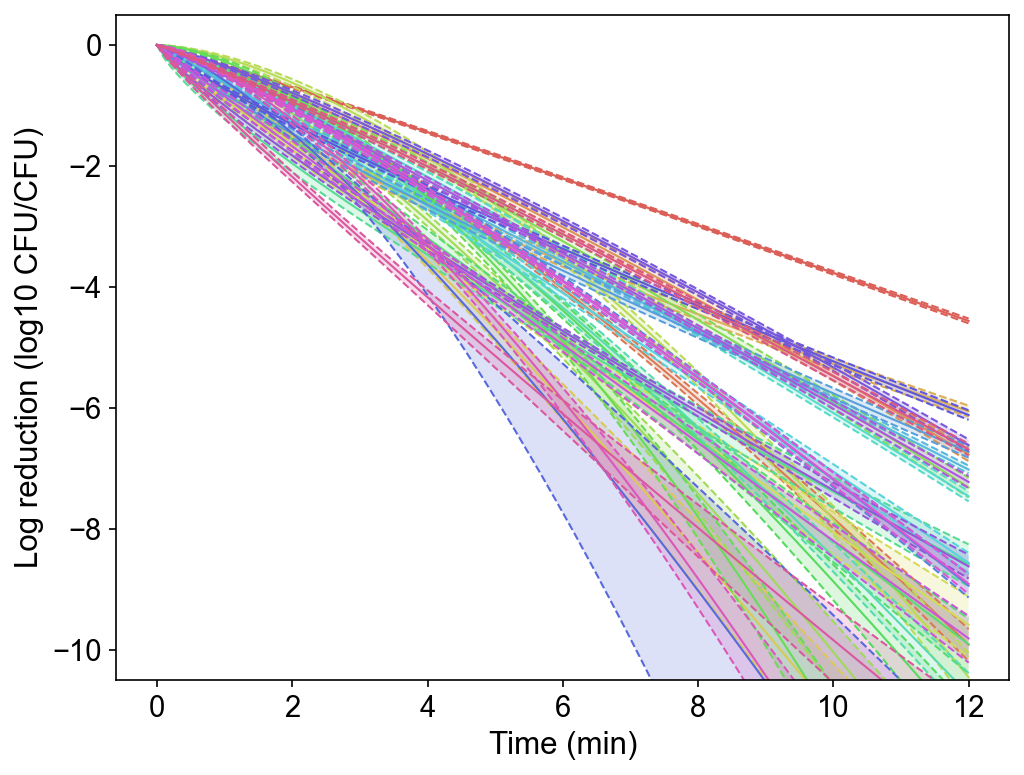

In [29]:

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")
plt.ylim([-10.5,0.5])

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for i in tqdm(range(1, StrainCount+1),desc='Progress', leave=False):
    StrainNum = i
    data_one_strain = data[data["ID_strain"]==StrainNum]
    
    time_min = 0
    time_max = 12
    devide = (time_max-time_min)*10
    time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                              (time_max-time_min)/devide, dtype="float")
    Num_mcmc = len(samples_MPC["lp__"])
    logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
    logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)
    
    for j in range(len(time_interval)):
        for k in range(Num_mcmc):
            if i in StrainNum_MPC:
                StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==(i)]))-1
                logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

        logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])
        
    plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
    plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
    plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
    plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.show()

Progress:   0%|          | 0/121 [00:00<?, ?it/s]

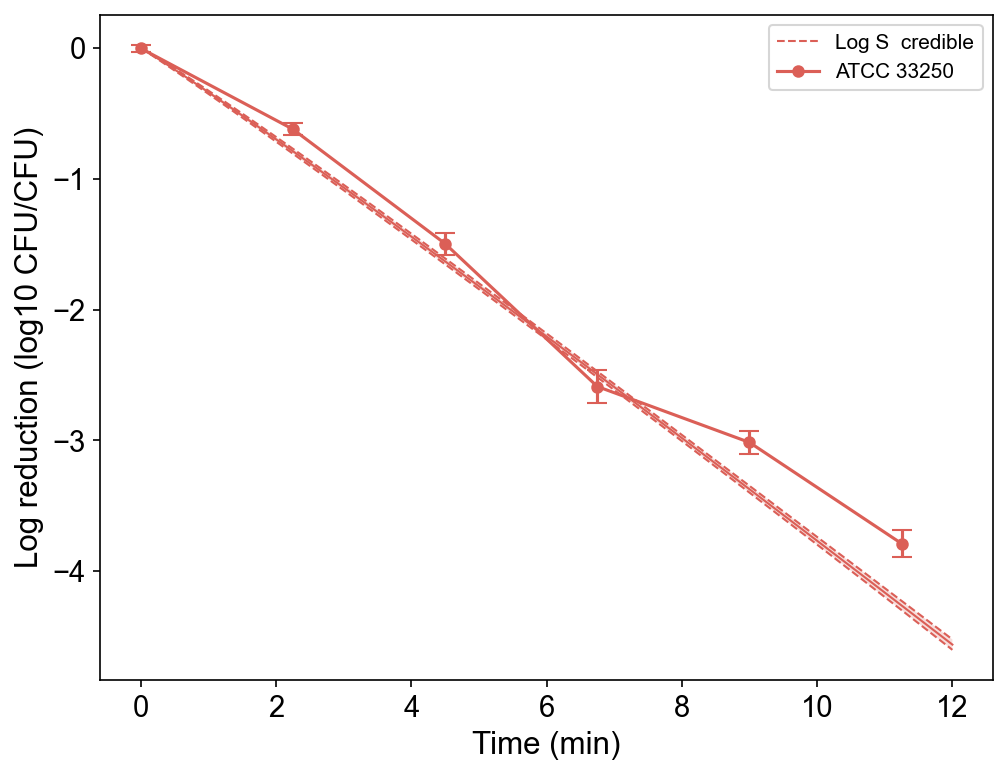

In [30]:
StrainNum = 1
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

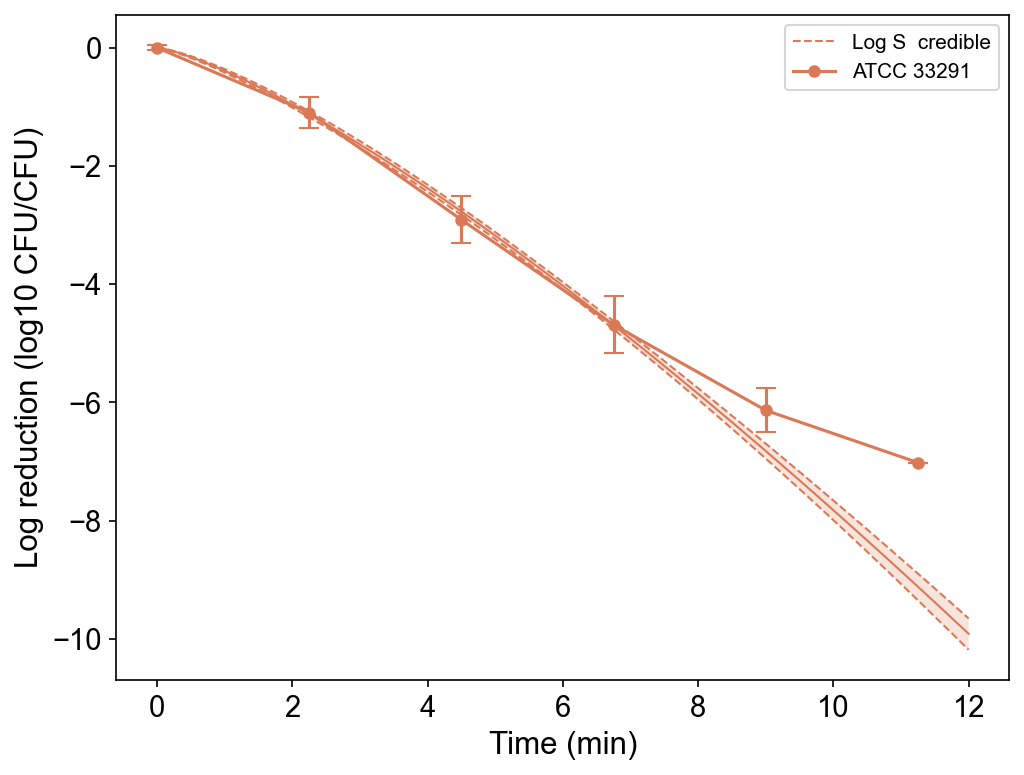

In [31]:
StrainNum = 2
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

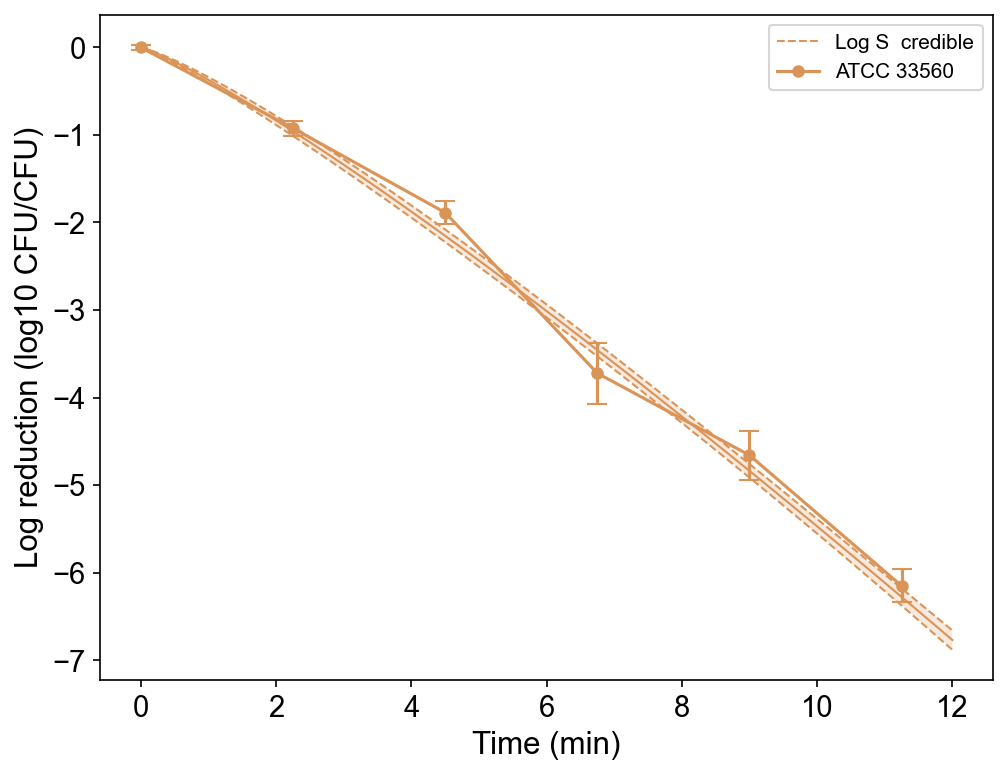

In [32]:
StrainNum = 3
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

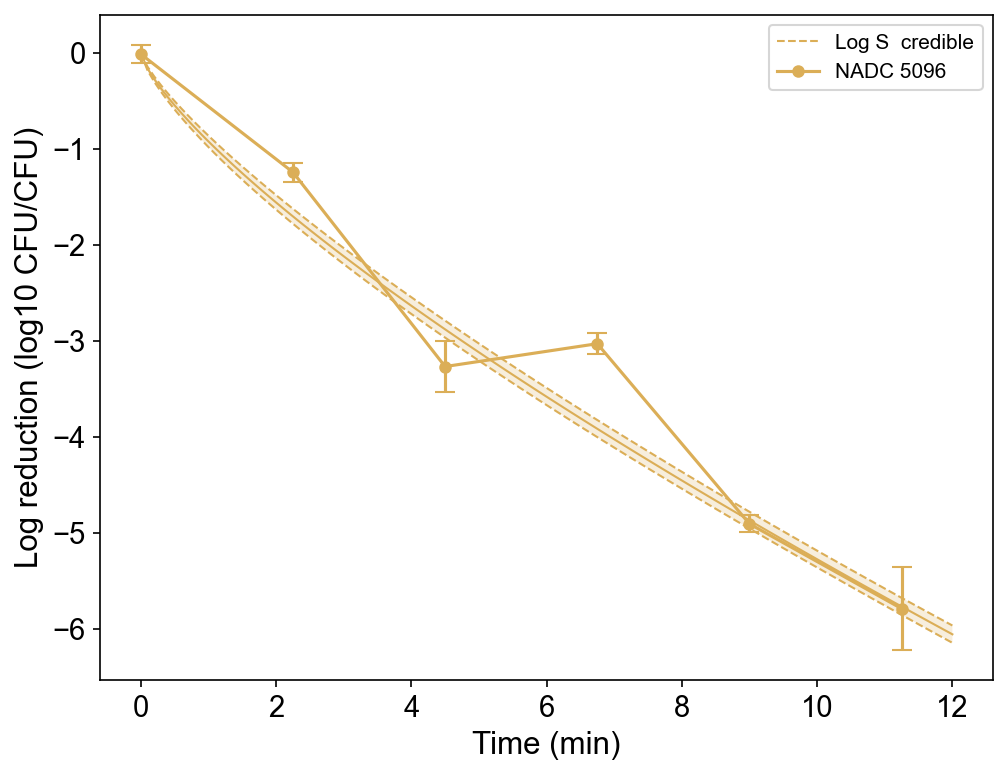

In [33]:
StrainNum = 4

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

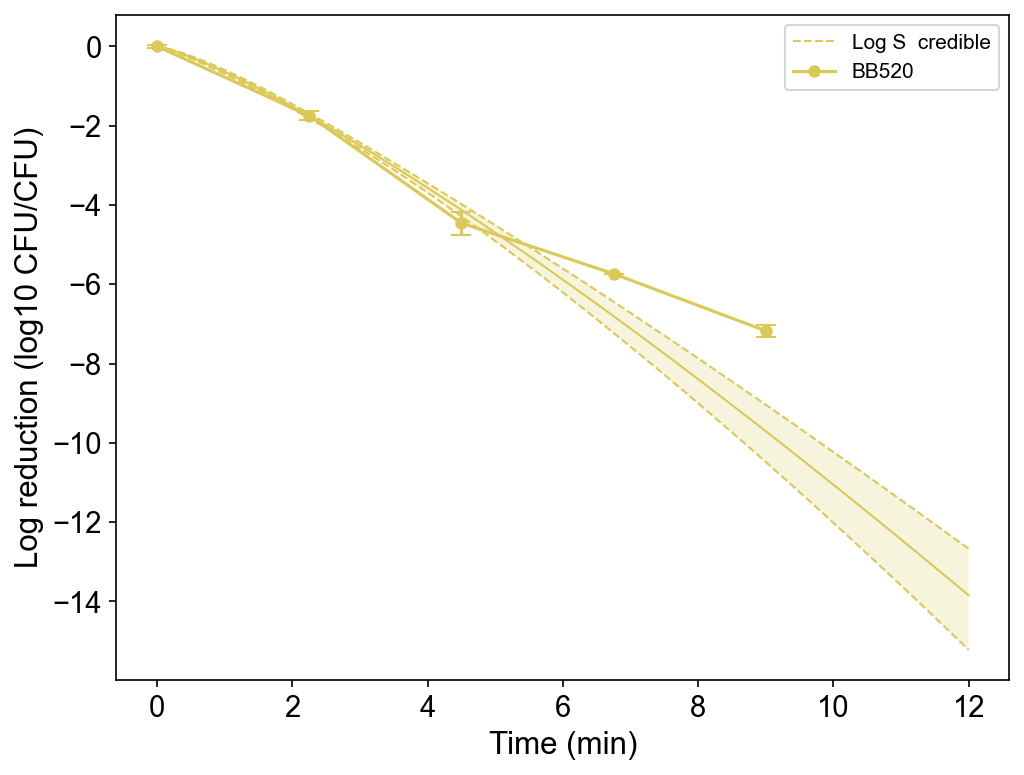

In [34]:
StrainNum = 5
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

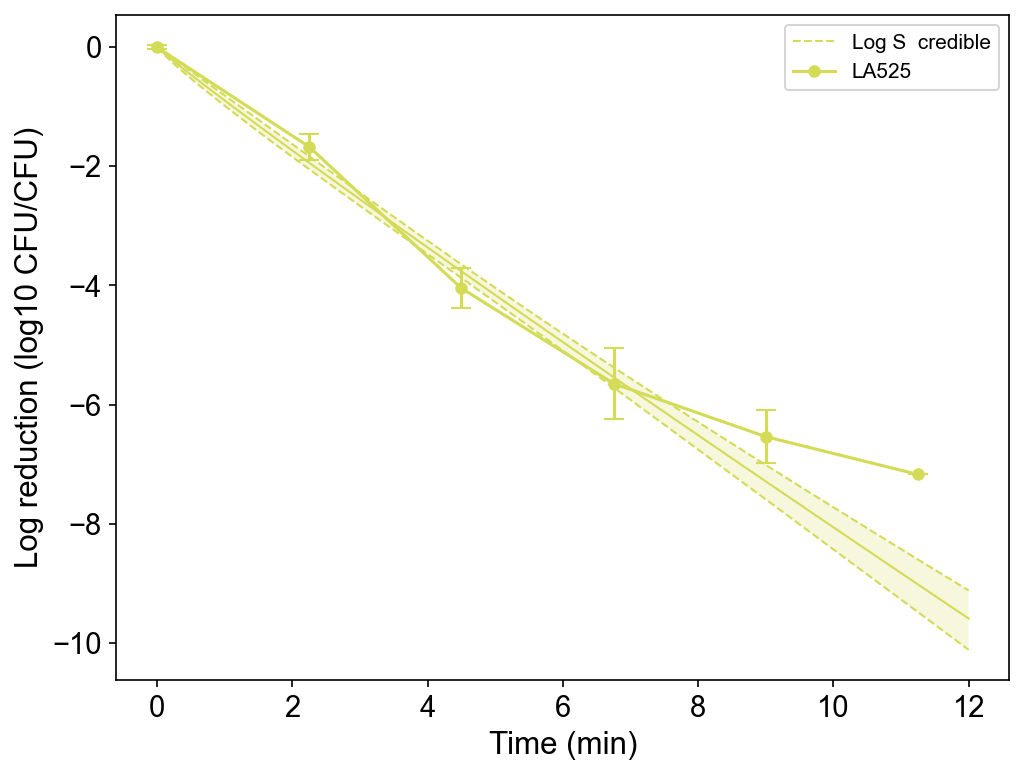

In [35]:
StrainNum = 6
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

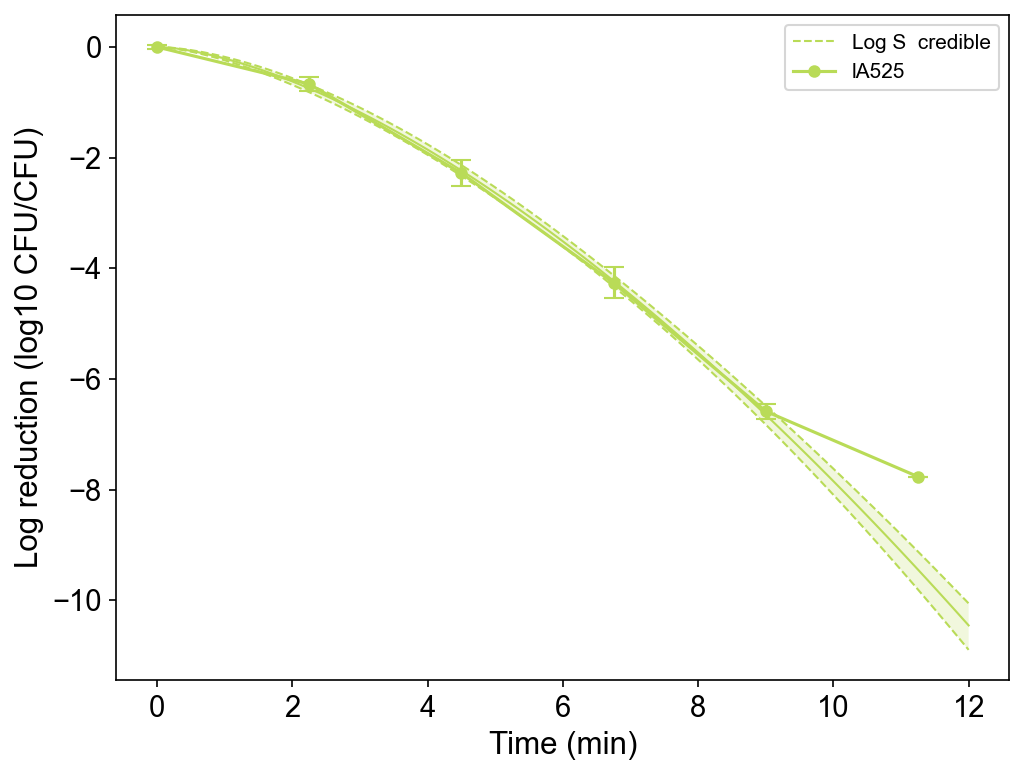

In [36]:
StrainNum = 7
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

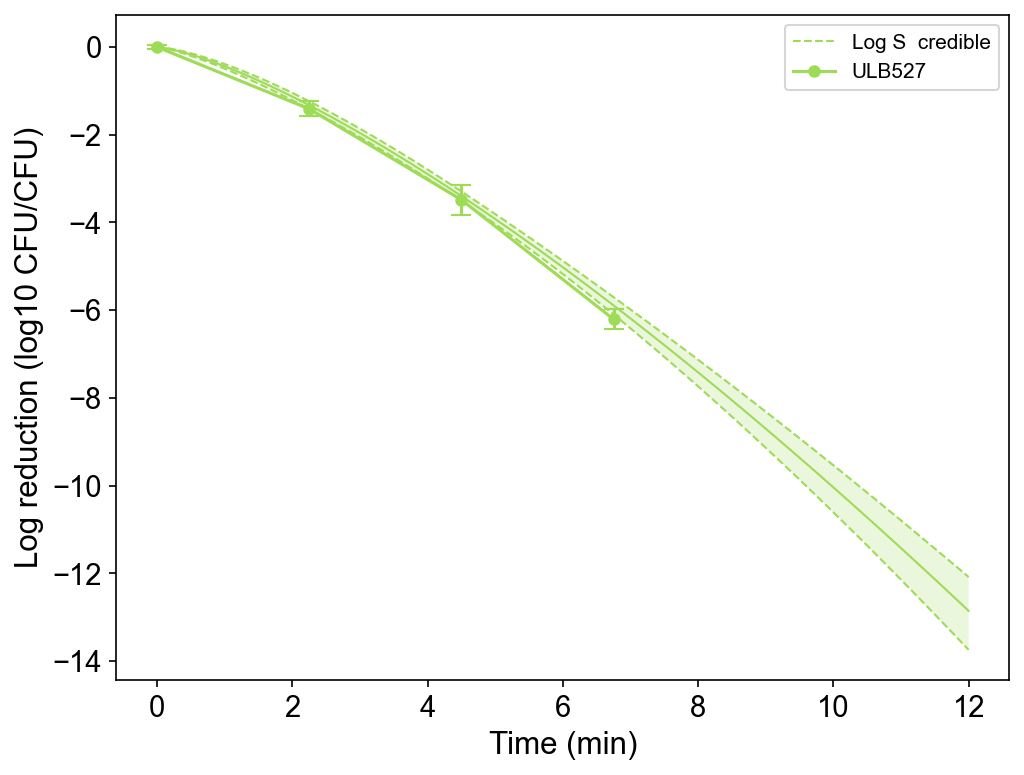

In [37]:
StrainNum = 8
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

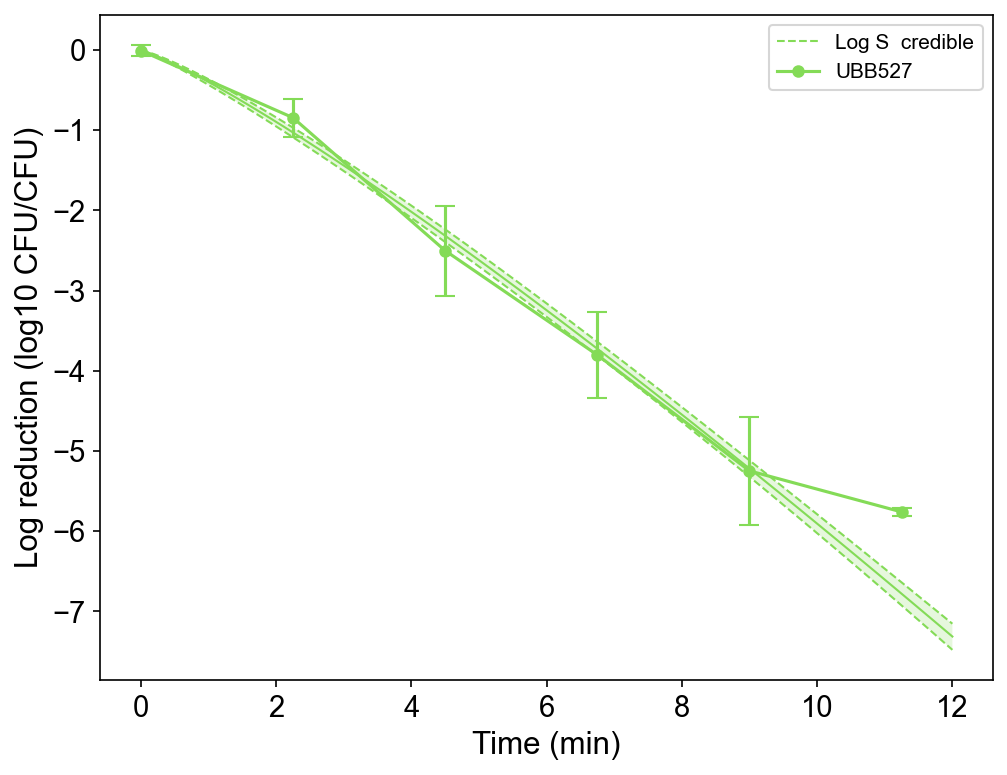

In [38]:
StrainNum = 9
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

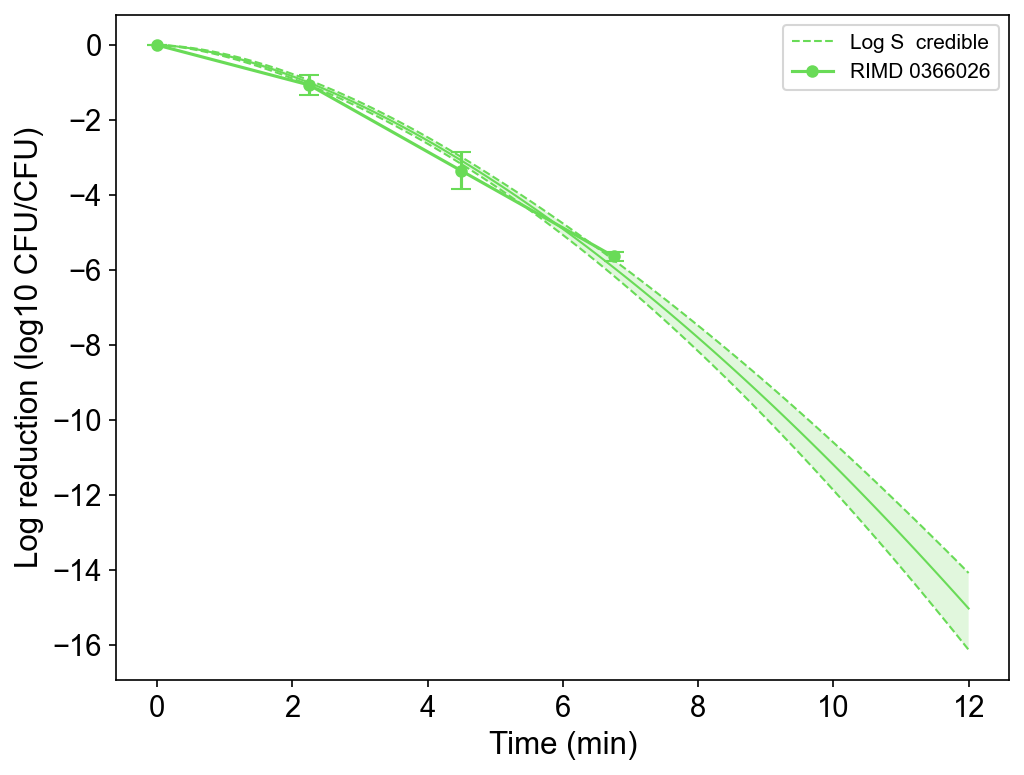

In [39]:
StrainNum = 10
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

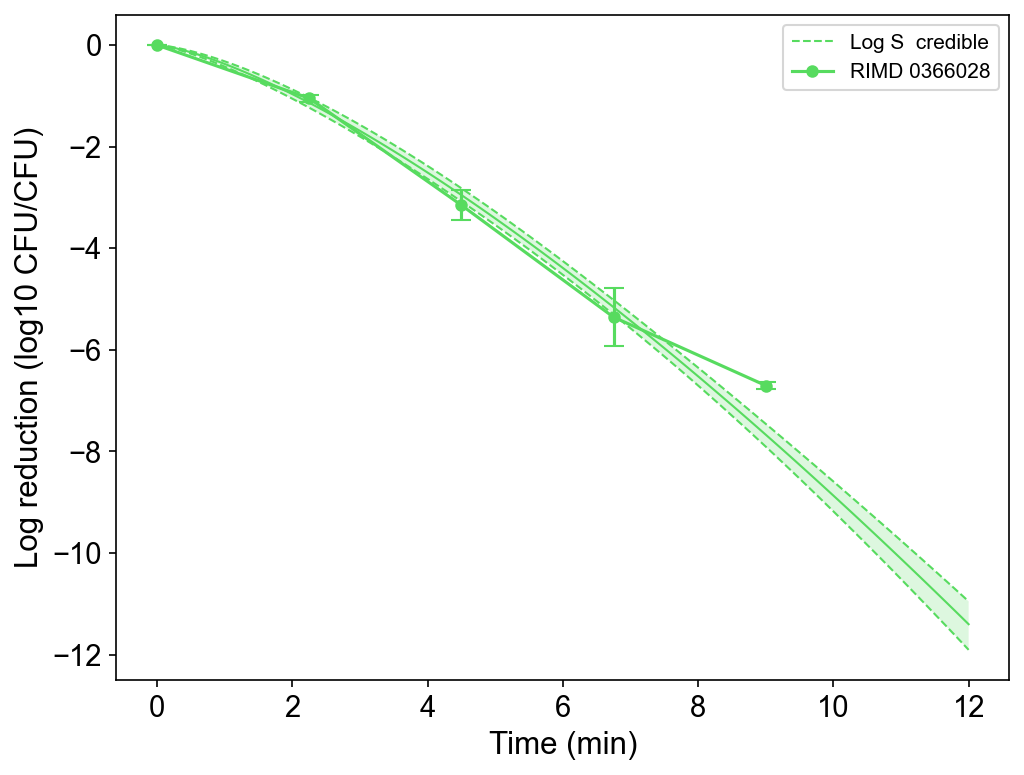

In [40]:
StrainNum = 11
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

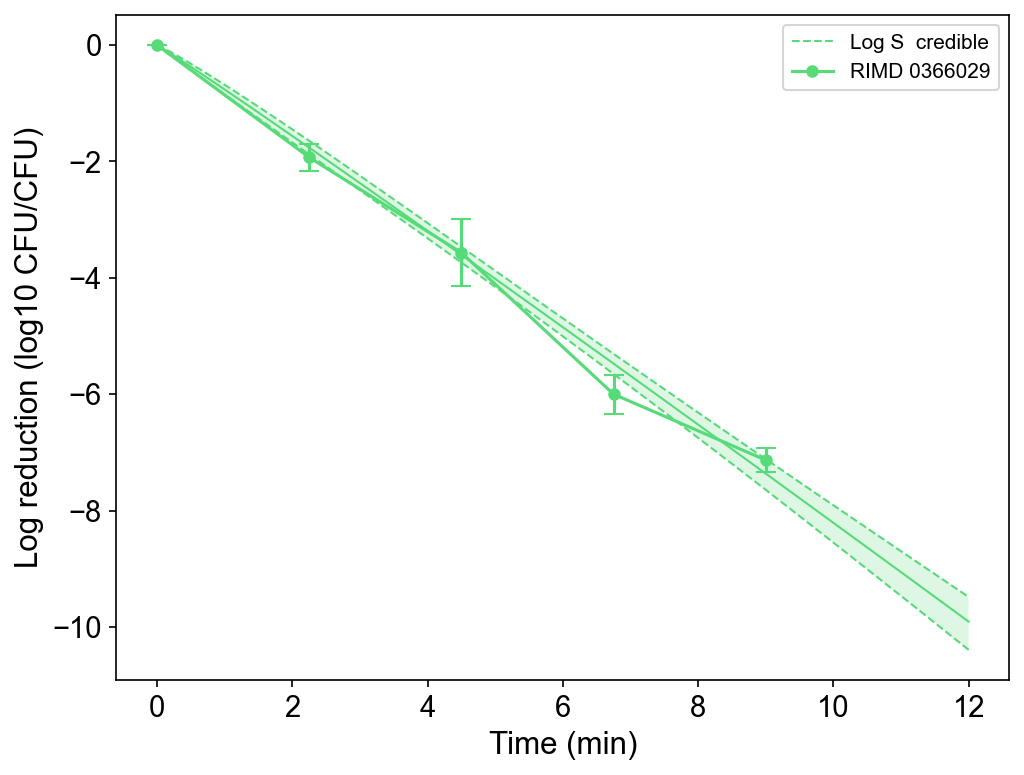

In [41]:
StrainNum = 12
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

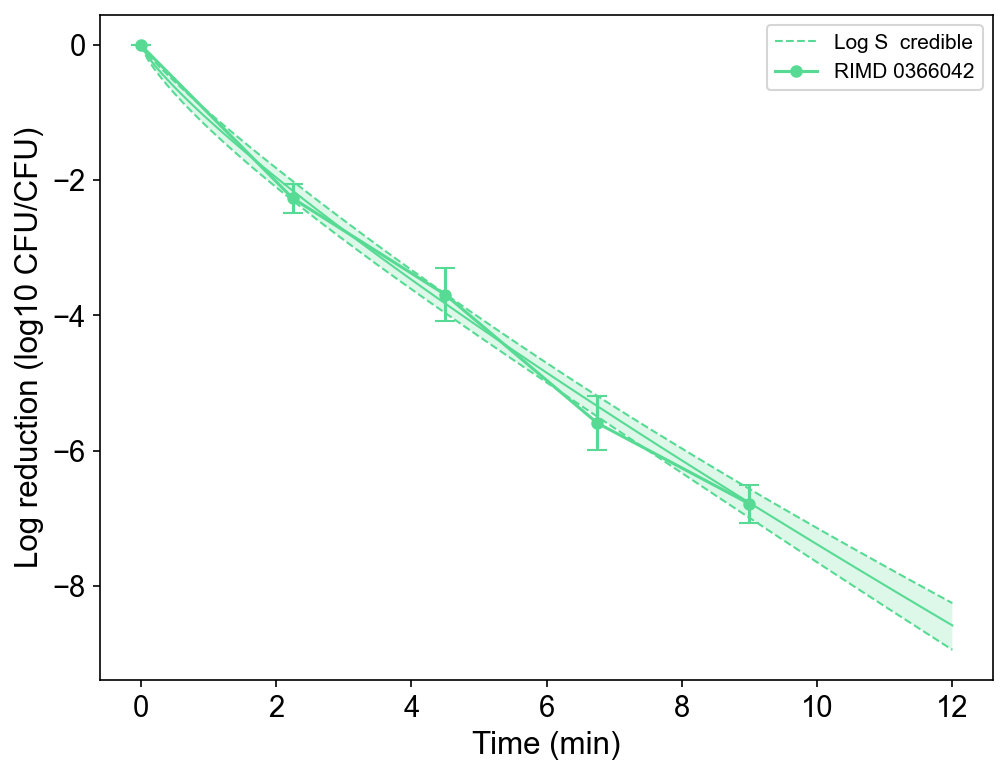

In [42]:
StrainNum = 13
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

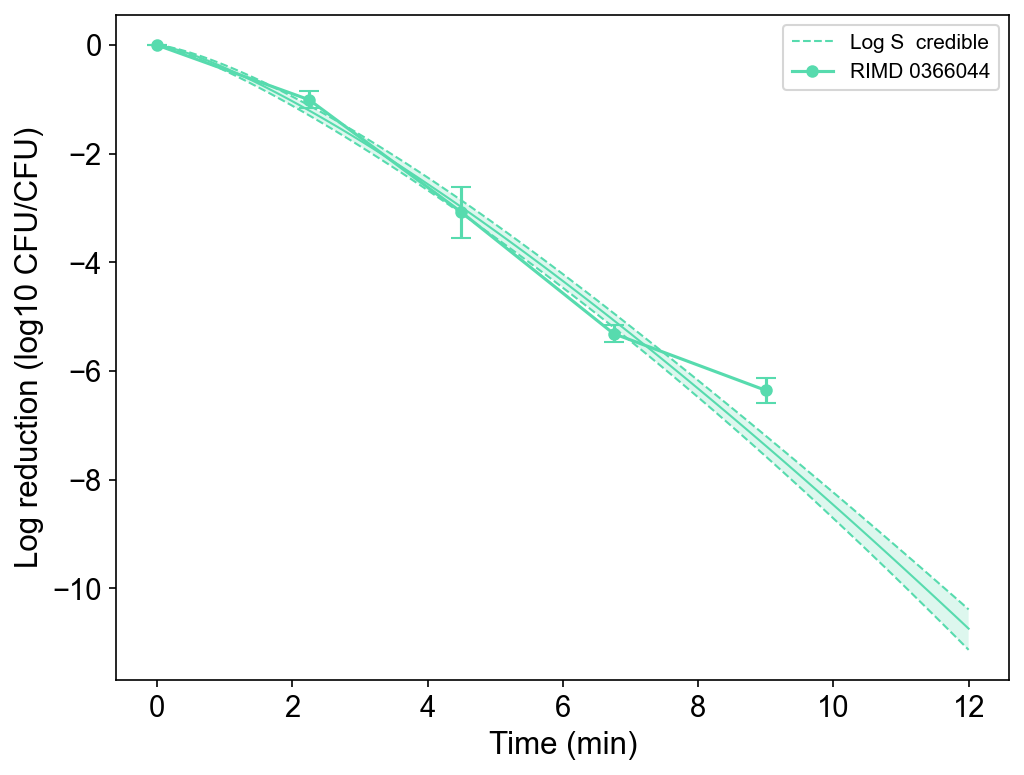

In [43]:
StrainNum = 14
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

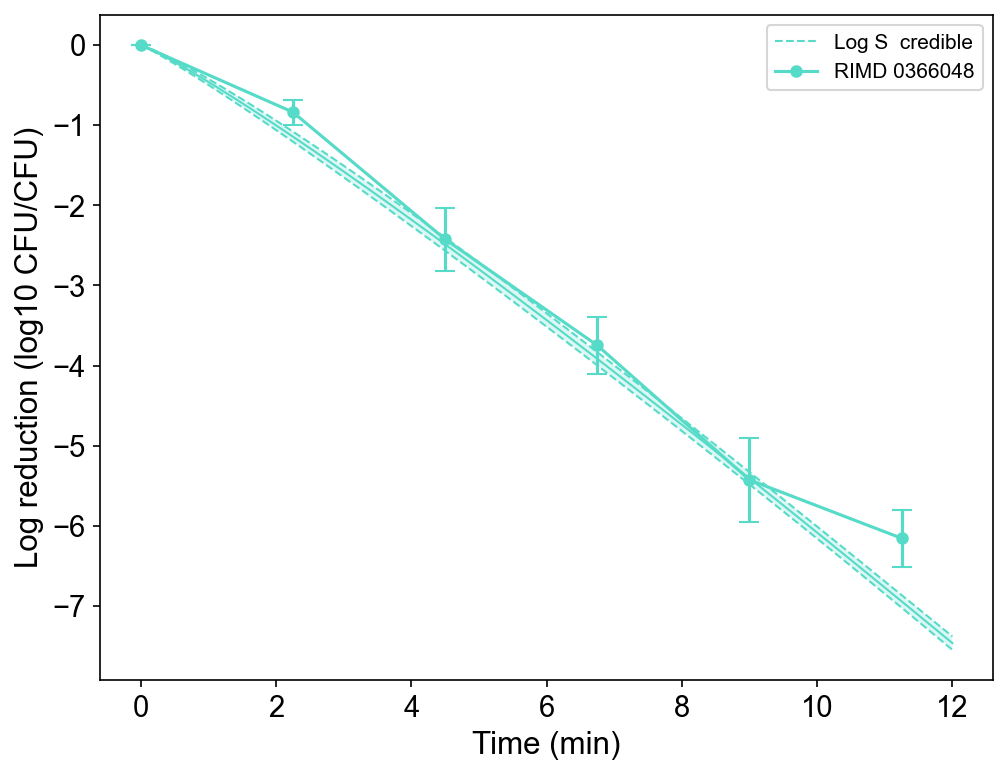

In [44]:
StrainNum = 15
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

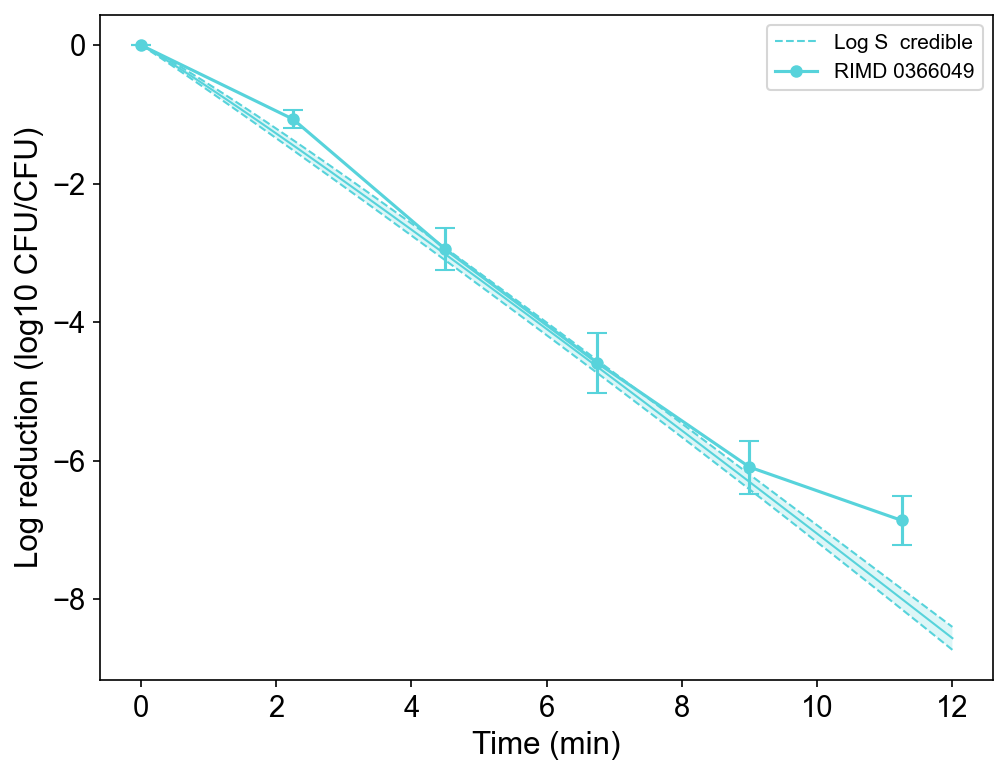

In [45]:
StrainNum = 16
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

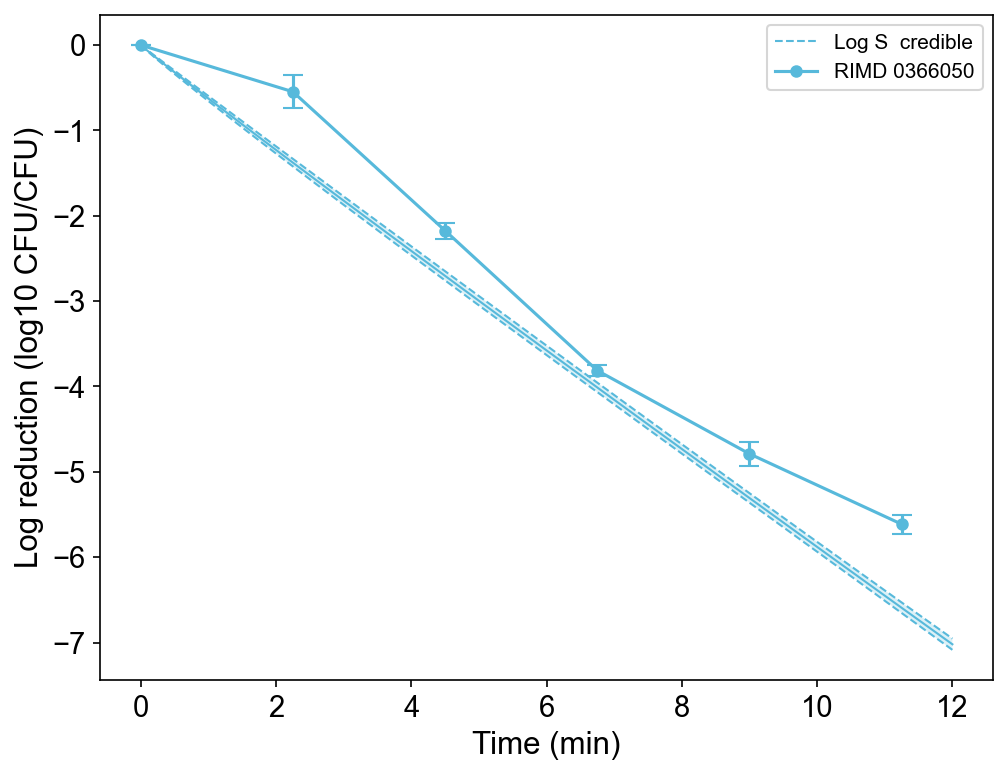

In [46]:
StrainNum = 17
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

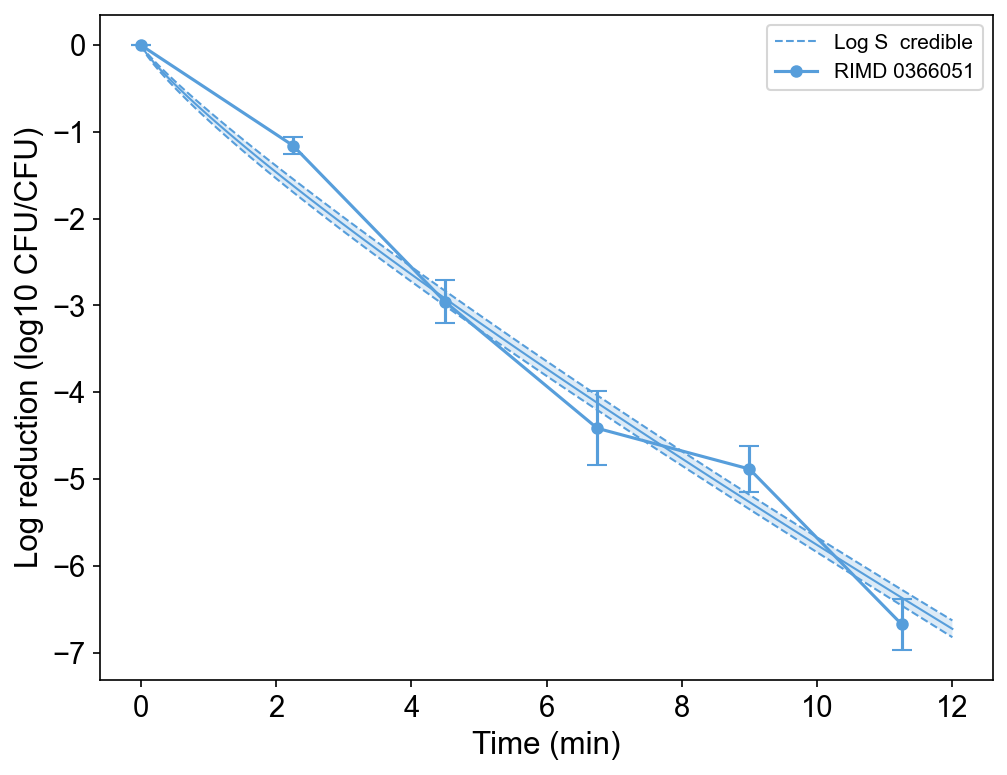

In [47]:
StrainNum = 18
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

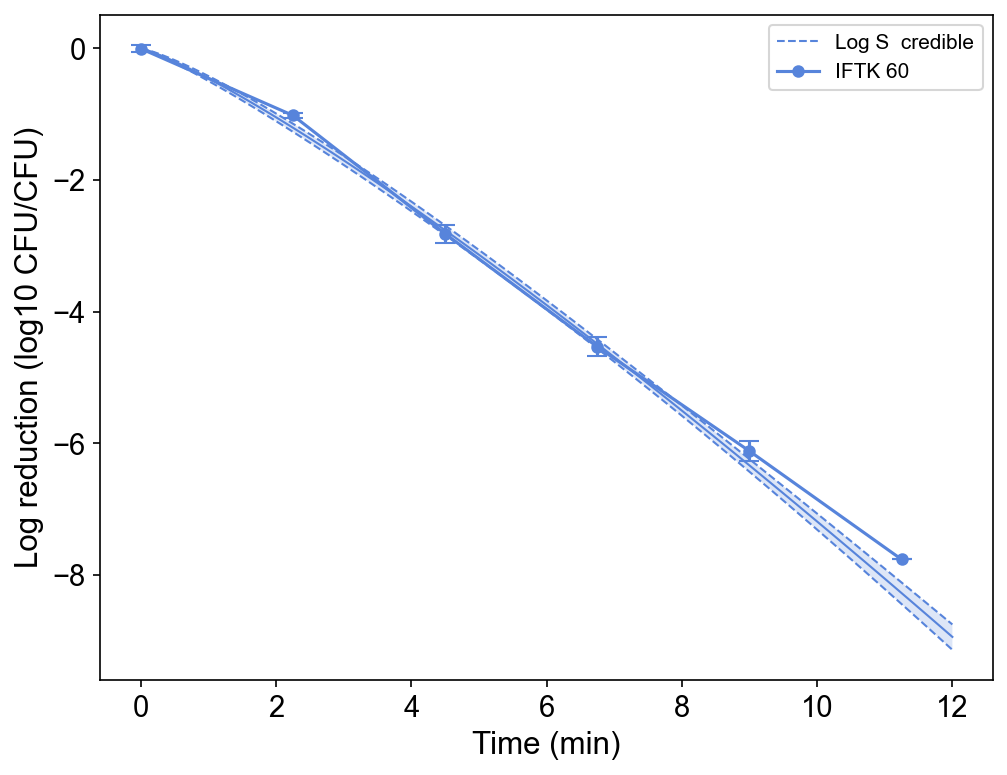

In [48]:
StrainNum = 19
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

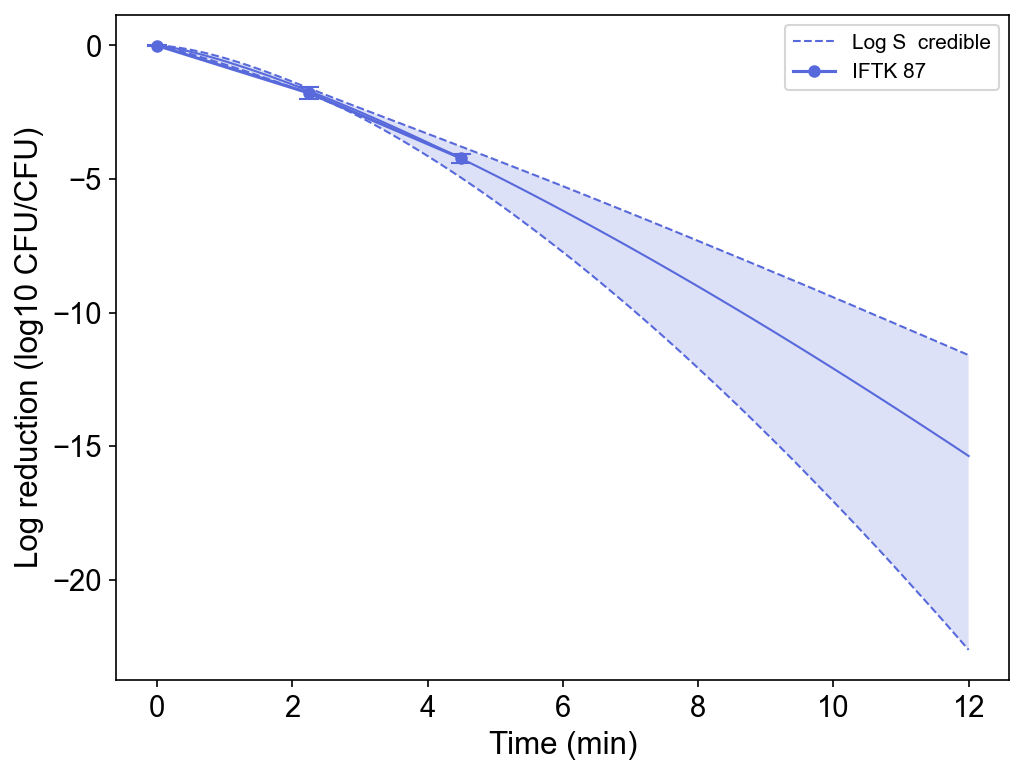

In [49]:
StrainNum = 20
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

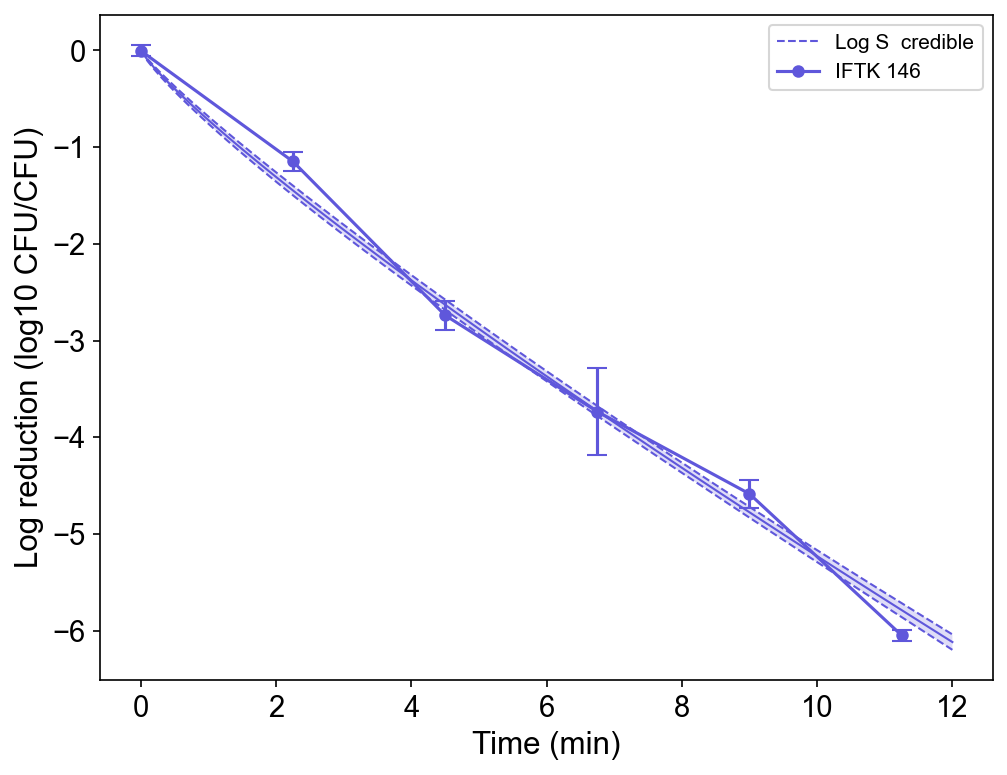

In [50]:
StrainNum = 21
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

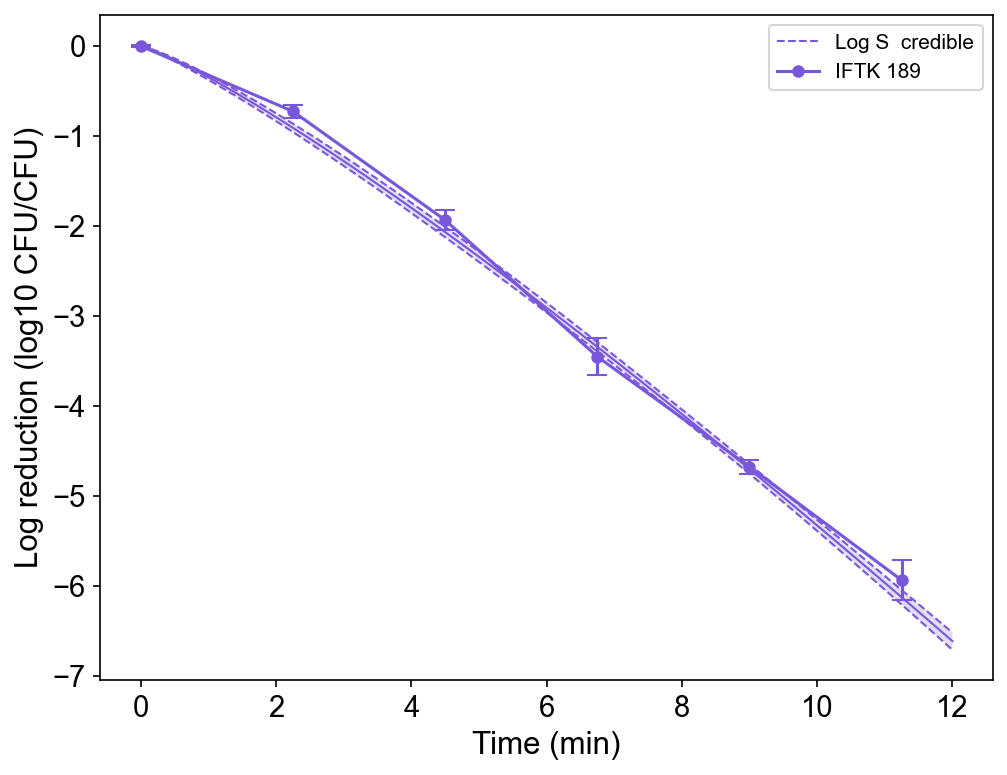

In [51]:
StrainNum = 22
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

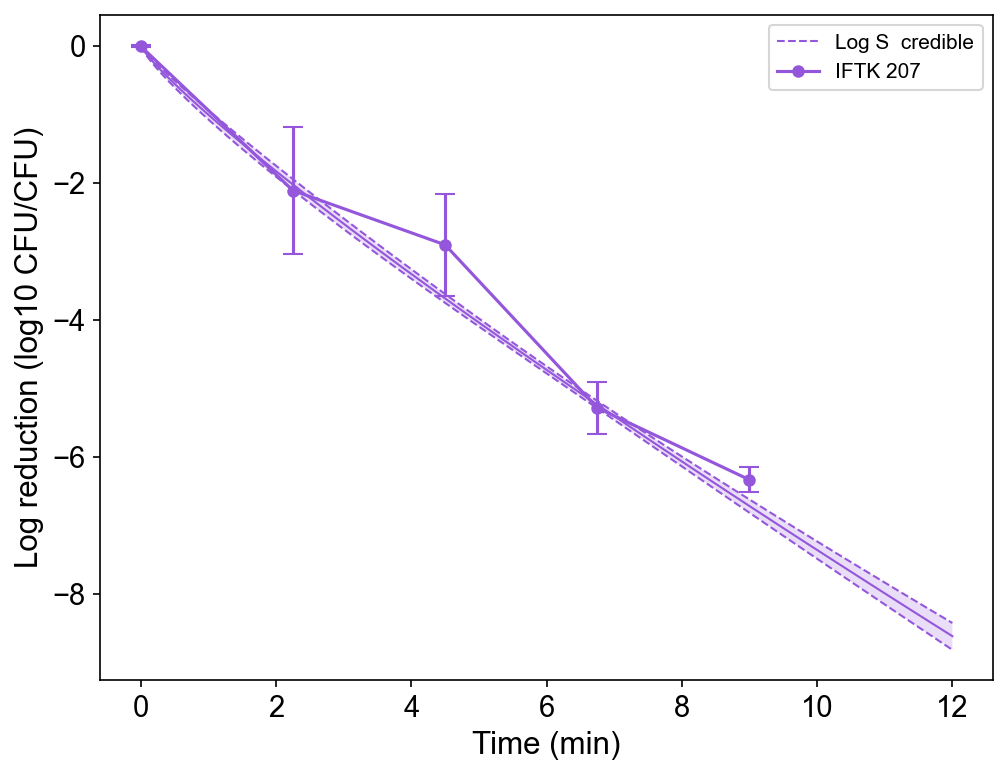

In [52]:
StrainNum = 23
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

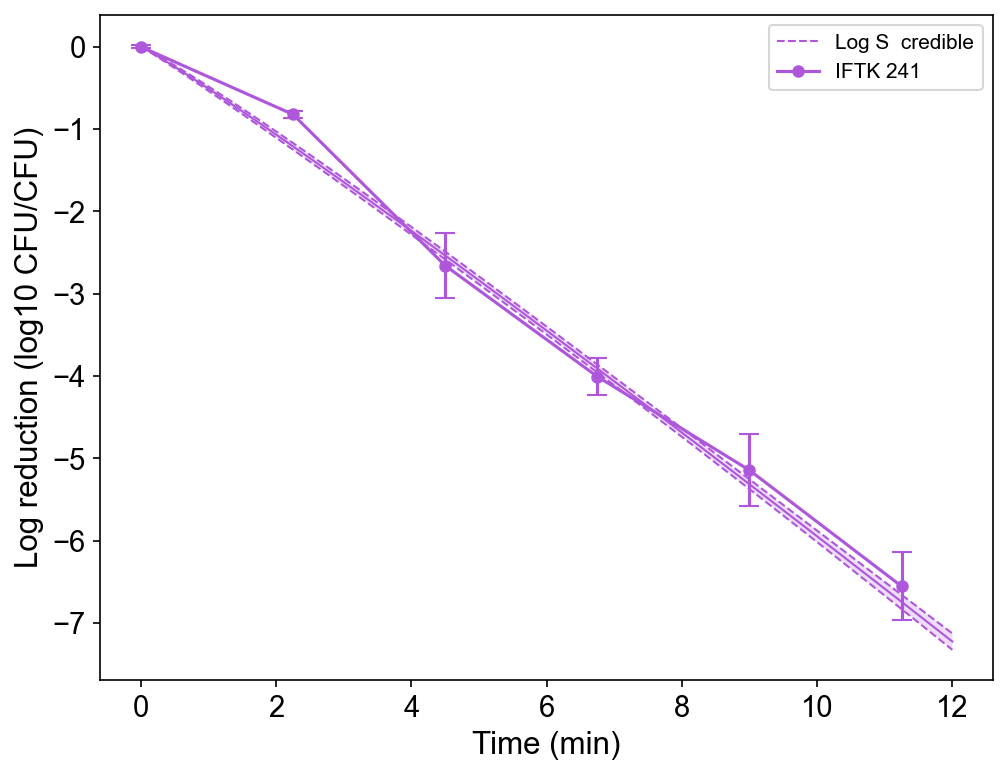

In [53]:
StrainNum = 24
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

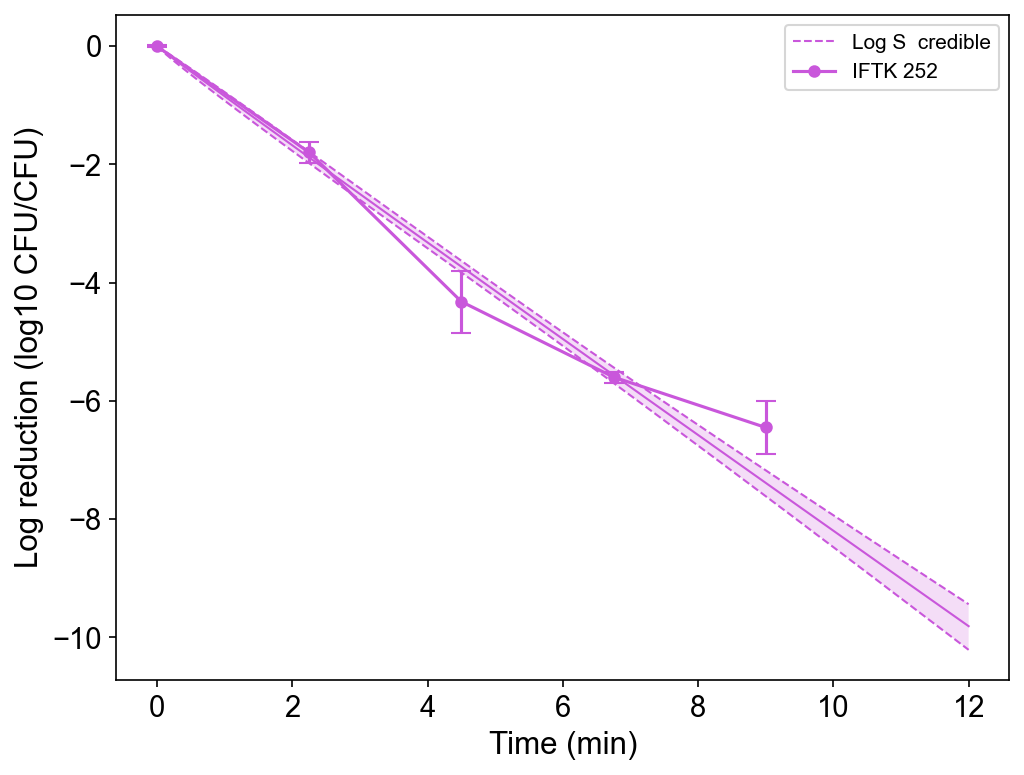

In [54]:
StrainNum = 25
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

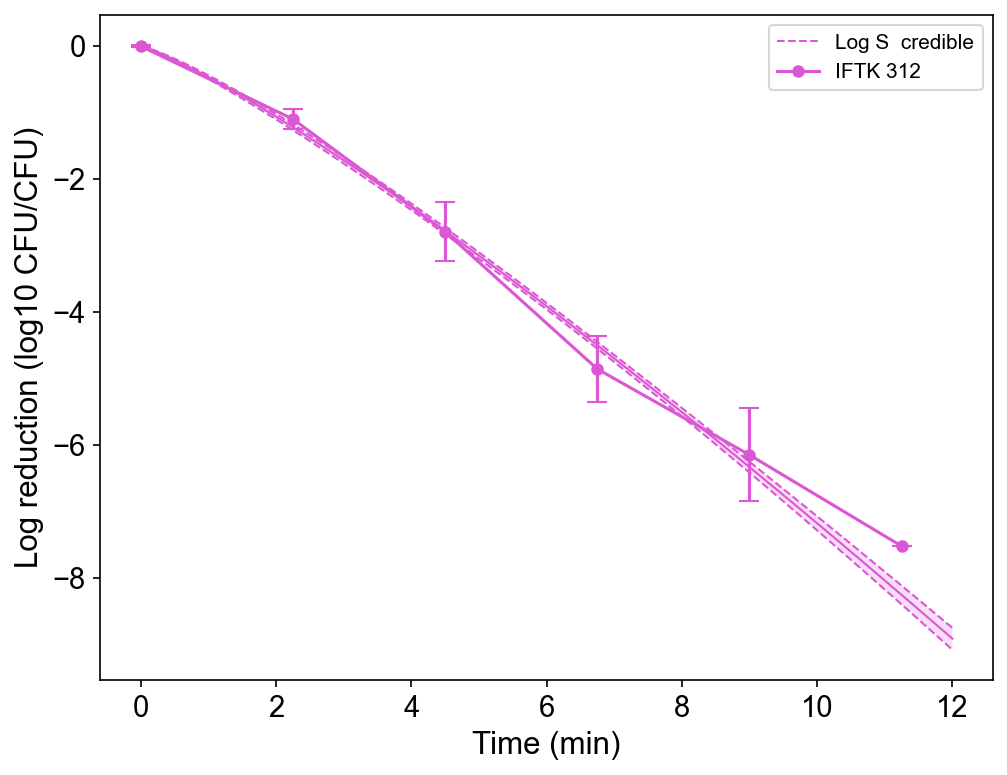

In [55]:
StrainNum = 26
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

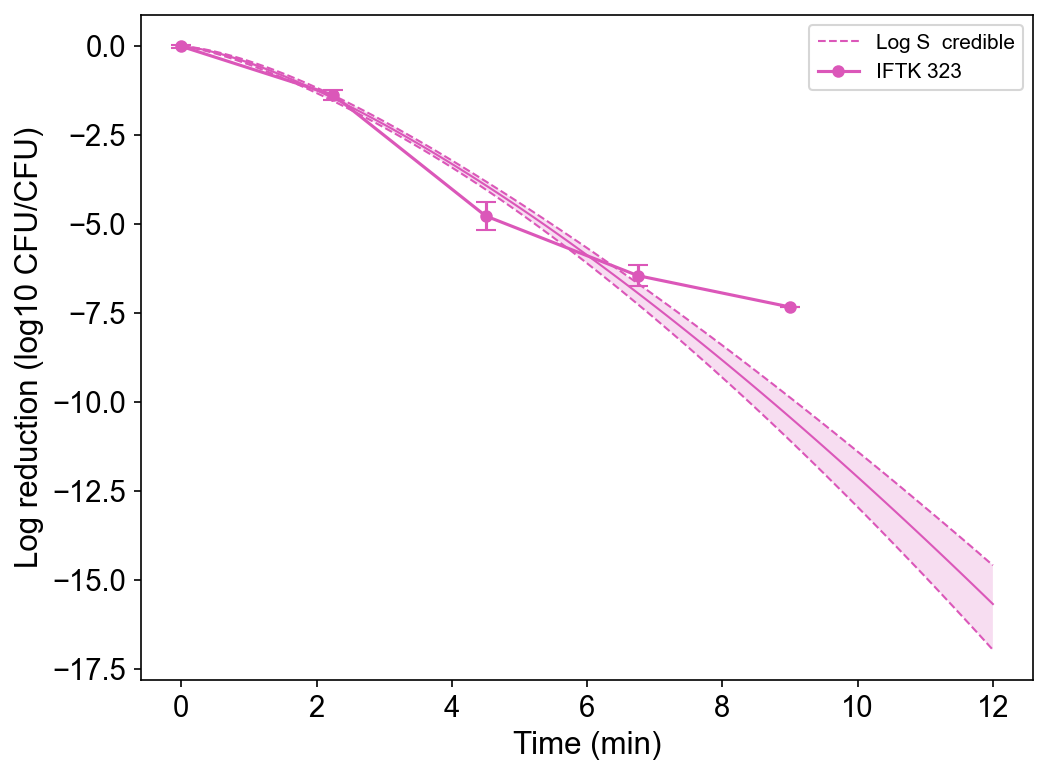

In [56]:
StrainNum = 27
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

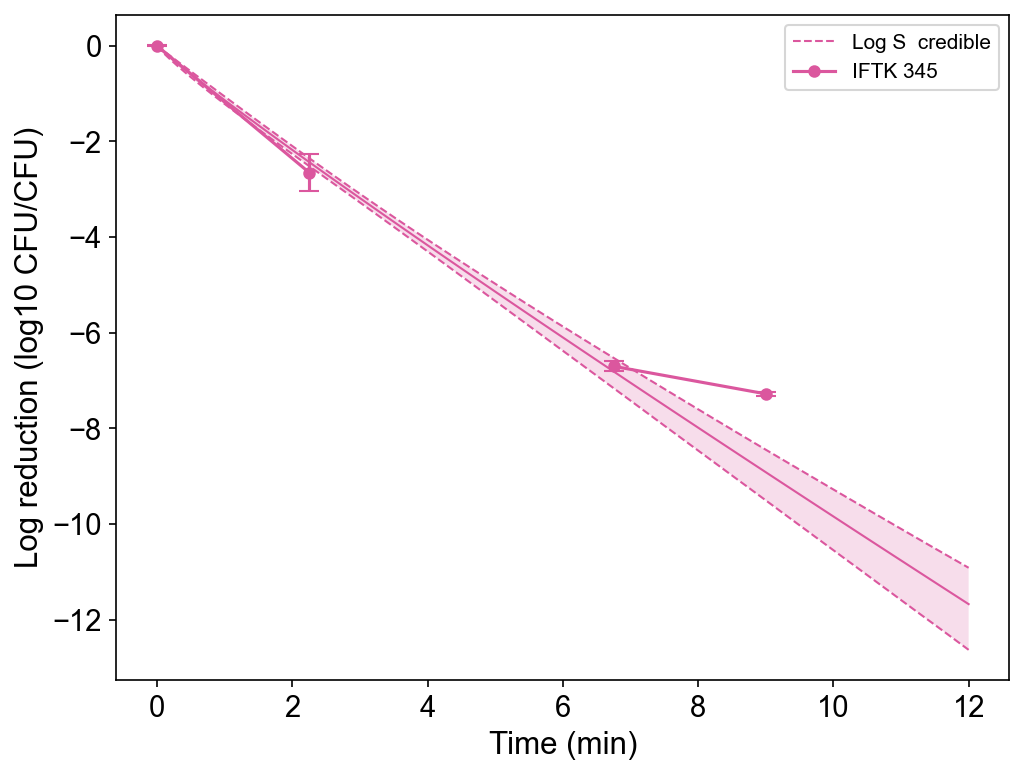

In [57]:
StrainNum = 28
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

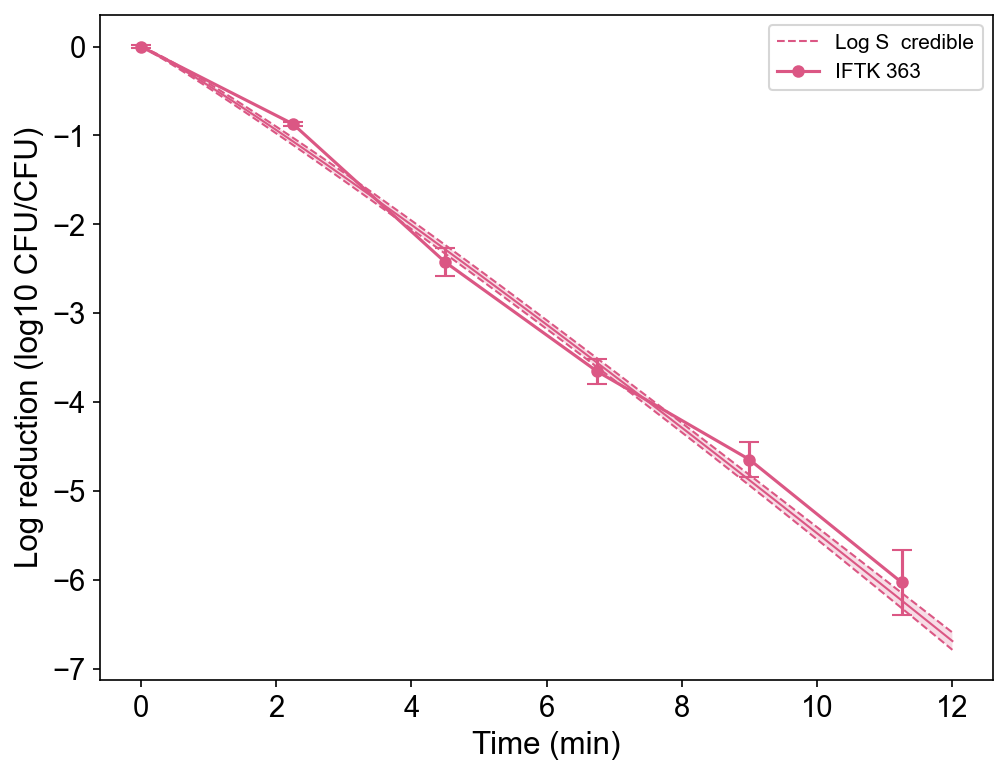

In [58]:
StrainNum = 29
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


Progress:   0%|          | 0/121 [00:00<?, ?it/s]

IndexError: index 29 is out of bounds for axis 0 with size 29

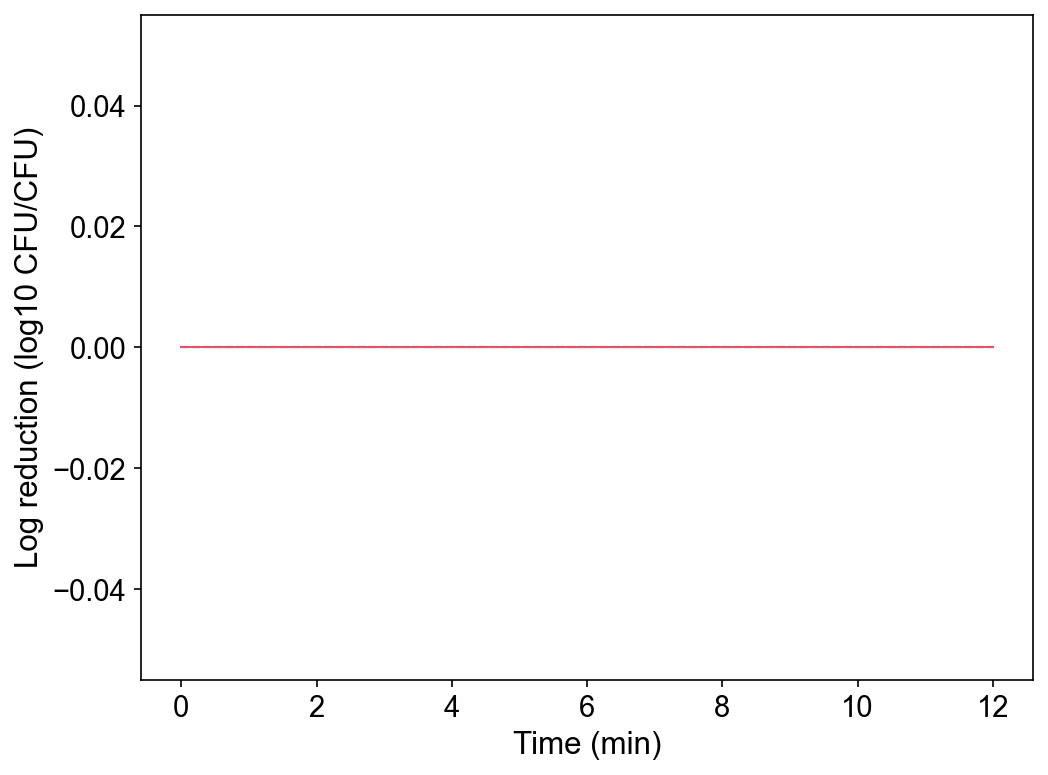

In [59]:
StrainNum = 30
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()


In [ ]:
StrainNum = 31
data_one_strain = data[data["ID_strain"]==StrainNum]

time_min = 0
time_max = 12
devide = (time_max-time_min)*10
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")
Num_mcmc = len(samples_MPC["lp__"])
logS_credible_mcmc = np.zeros((len(time_interval),Num_mcmc), dtype=float)
logS_credible_mcmc_quantile = np.zeros((len(time_interval), 3), dtype=float)

for j in tqdm(range(len(time_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        
            
            

        if StrainNum in StrainNum_MPC:
            StNum = int(np.min(datum_MPC["ID_strain_MPC"][datum_MPC["ID_strain"]==StrainNum]))-1
            logS_credible_mcmc[j,k] = Fit_Model(time_interval[j],samples_MPC["delta"][k, StNum], samples_MPC["power"][k, StNum])

    logS_credible_mcmc_quantile[j,:] = np.quantile(logS_credible_mcmc[j,:],[0.005,  0.5, 0.995])

plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Time (min)",size=15,fontname="Arial")
plt.ylabel("Log reduction (log10 CFU/CFU)",size=15,fontname="Arial")

plt.fill_between(time_interval, logS_credible_mcmc_quantile[:,0], logS_credible_mcmc_quantile[:,2], facecolor=Palette[StrainNum-1], alpha=0.2)
plt.plot(time_interval, logS_credible_mcmc_quantile[:,0], lw=1, color=Palette[StrainNum-1], linestyle='--')
plt.plot(time_interval, logS_credible_mcmc_quantile[:,2], lw=1, color=Palette[StrainNum-1], linestyle='--', label="Log S credible")
plt.plot(time_interval, logS_credible_mcmc_quantile[:,1], lw=1, color=Palette[StrainNum-1])

plt.plot(
    time, Means[StrainNum-1,:], 
    linestyle='-', 
    marker='.', 
    ms=10, 
    color=Palette[StrainNum-1], 
    label=StrainName[StrainNum-1]
)
plt.errorbar(
    time,Means[StrainNum-1,:],
    yerr=list(Stds[StrainNum-1,:]),
    fmt="none",
    color=Palette[StrainNum-1],
    capsize = 5
)
plt.legend()
plt.show()
